In [1]:
import radd
from radd import build
from radd.tools import vis
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in example dataframe 
data = radd.load_example_data()
# baseline (bsl) and caution (pnl) conditions in 'Cond' column
data.head()

,idx,Cond,ttype,choice,response,acc,rt,ssd
0,28,bsl,go,go,1,1,0.59853,1000
1,28,bsl,go,go,1,1,0.52017,1000
2,28,bsl,go,go,1,1,0.54513,1000
3,28,bsl,go,go,1,1,0.57159,1000
4,28,bsl,go,go,1,1,0.50522,1000


In [3]:
# initiate dependent process model with dynamic gain (kind = 'xdpm')
# (change kind='dpm' for model with no dynamic gain signal)
# drift-rate (v) depends on Baseline and Caution levels of 'Cond' variable
dpm = build.Model(kind='xdpm', data=data, depends_on={'v':'Cond'}, fit_on='average')

## Animation of Dependent Process Model


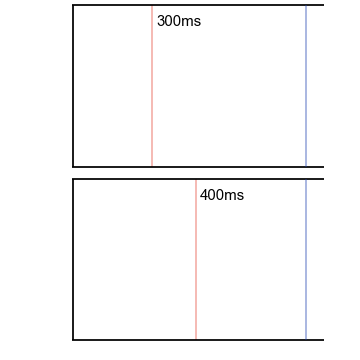
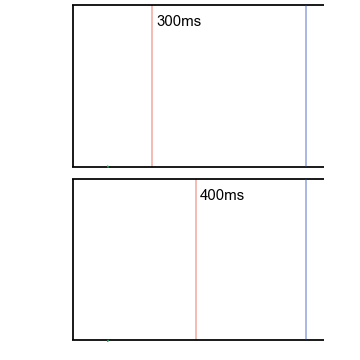
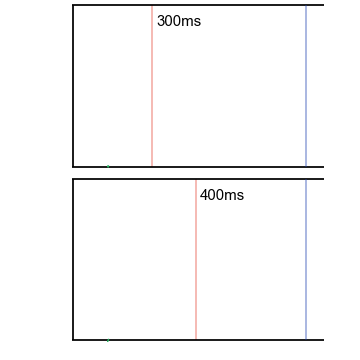
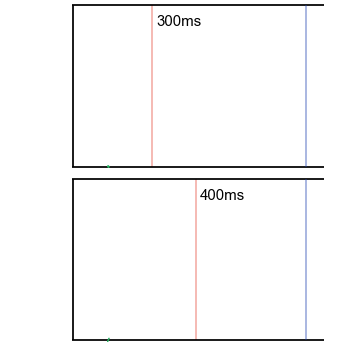
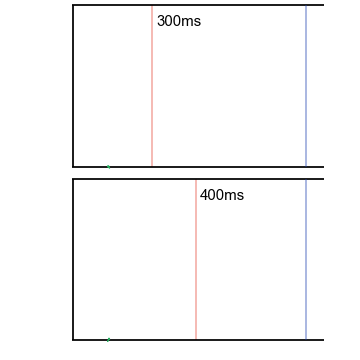
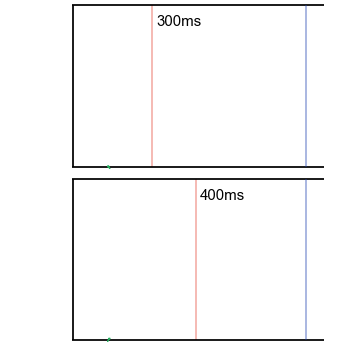
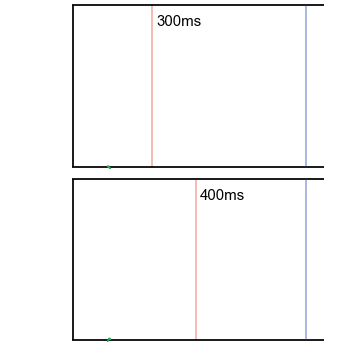
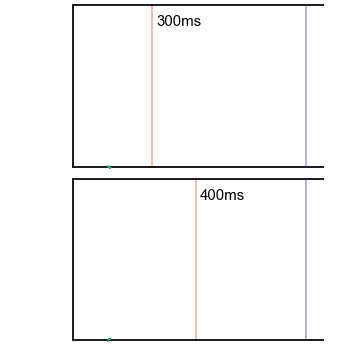
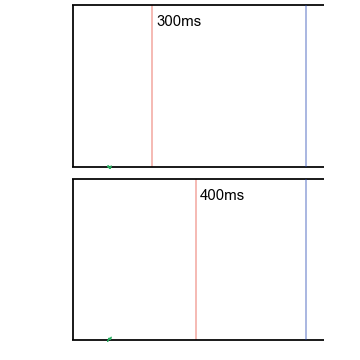
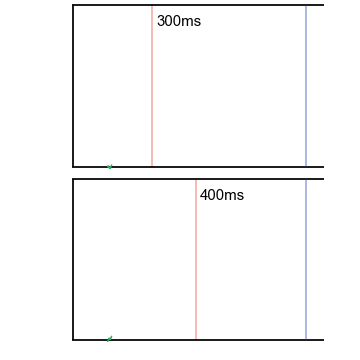
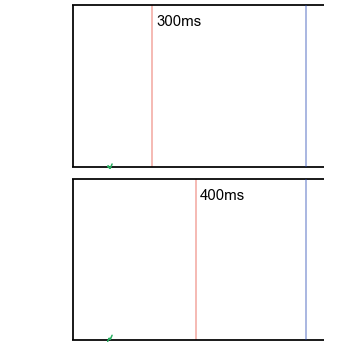
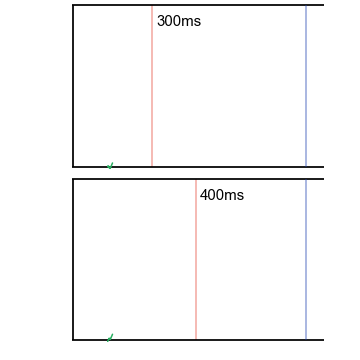
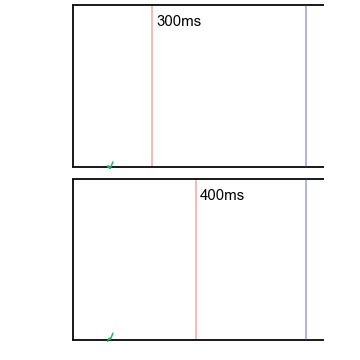
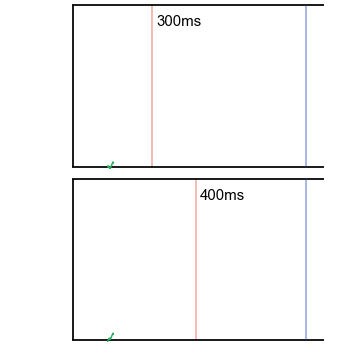
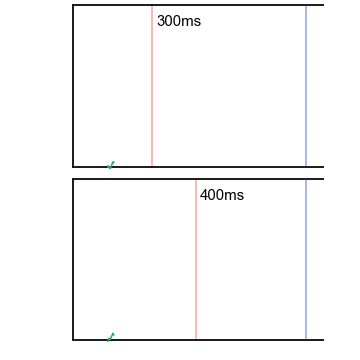
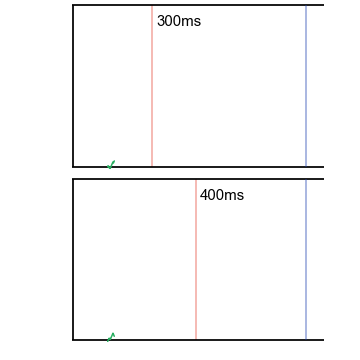
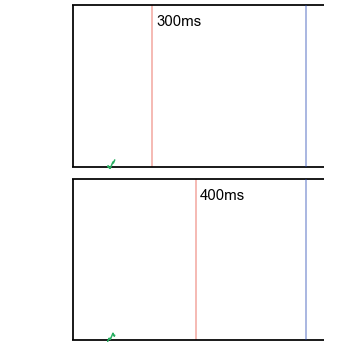
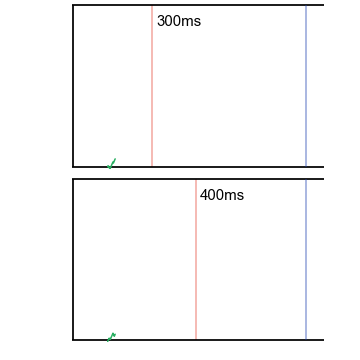
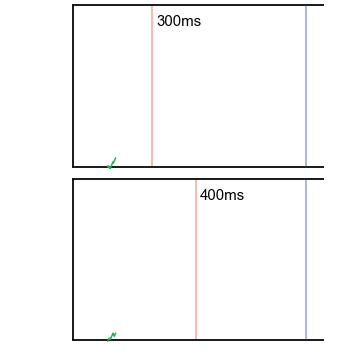
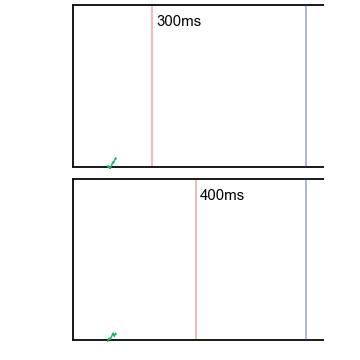
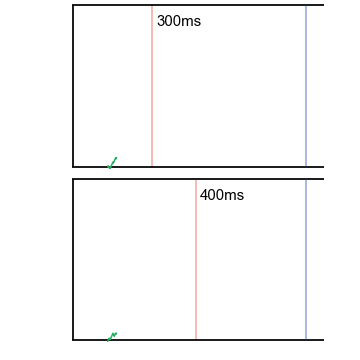
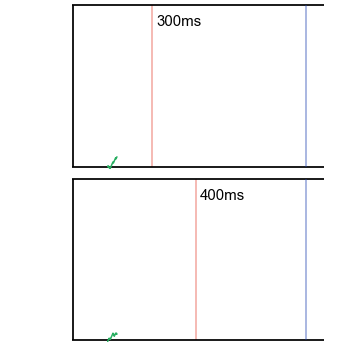
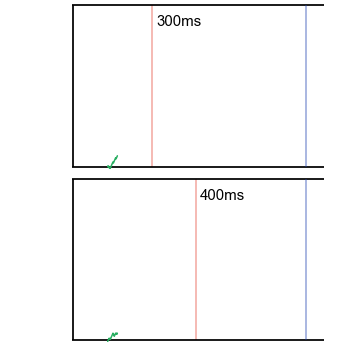
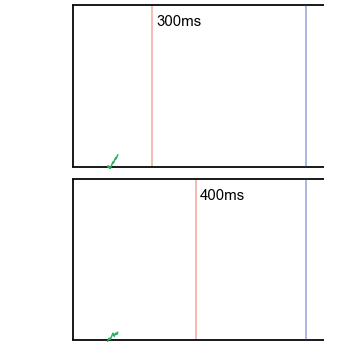
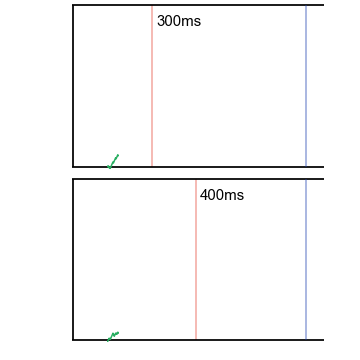
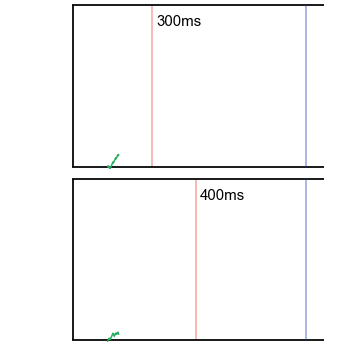
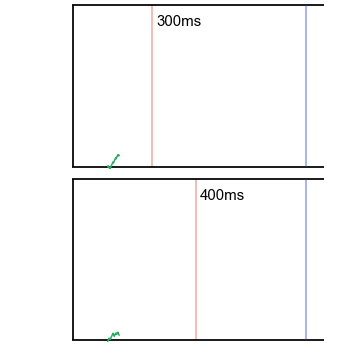
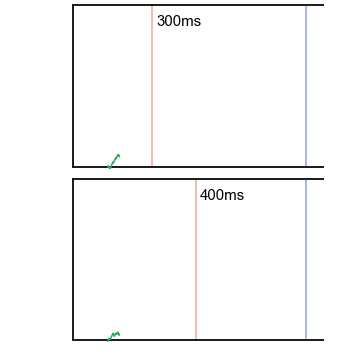
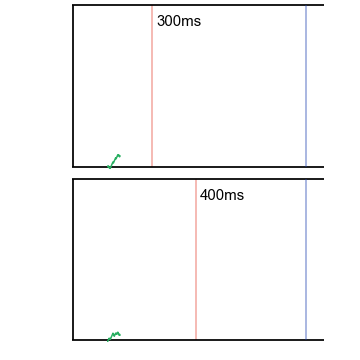
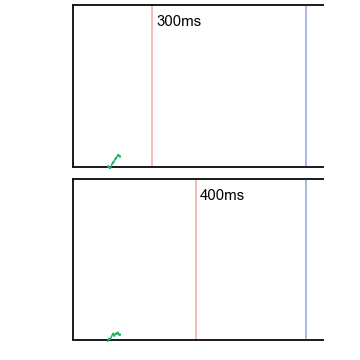
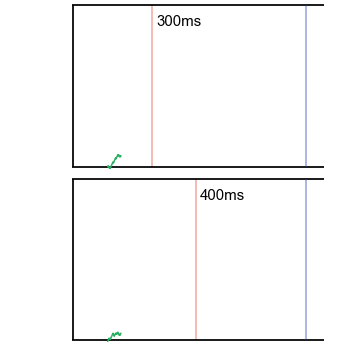
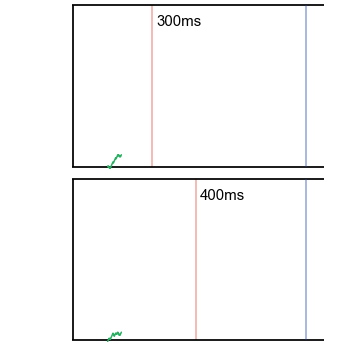
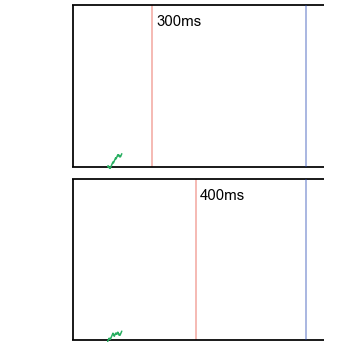
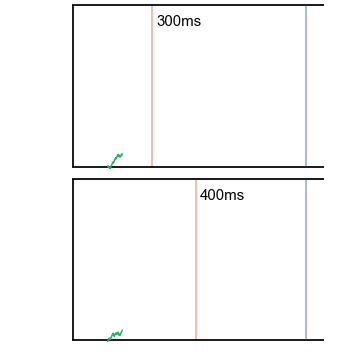
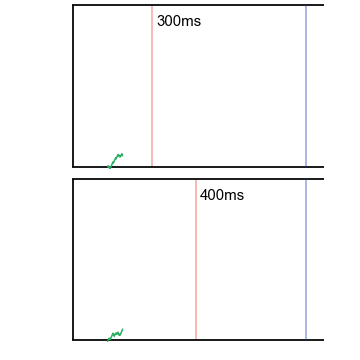
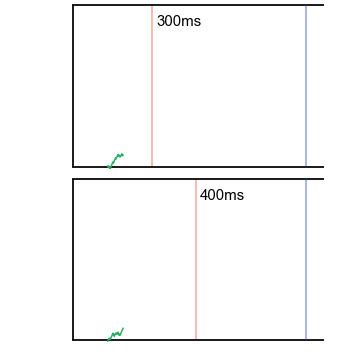
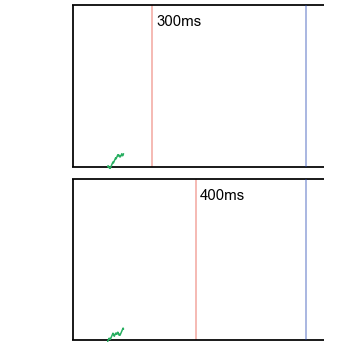
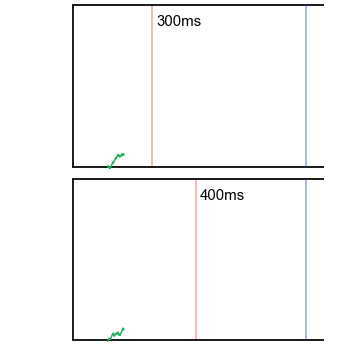
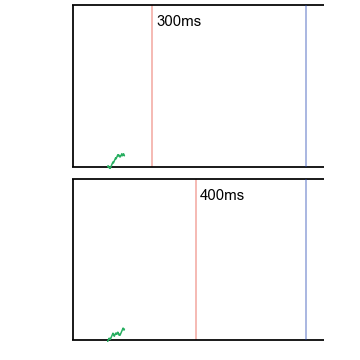
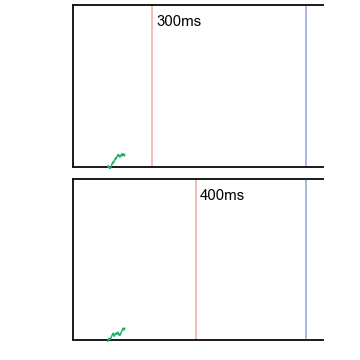
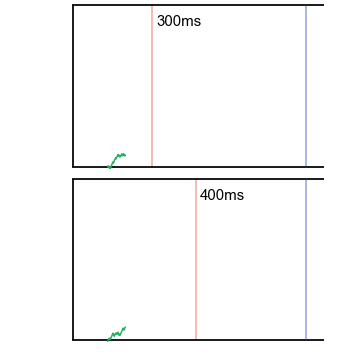
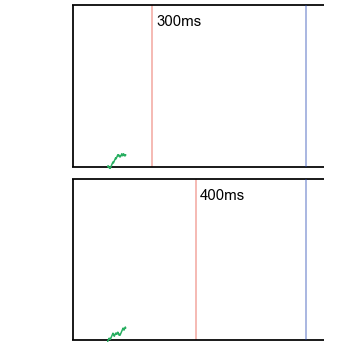
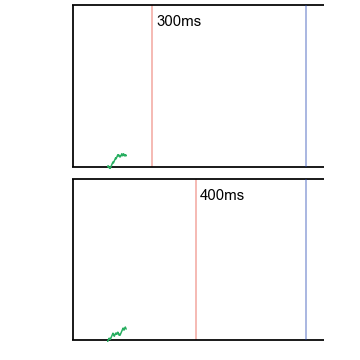
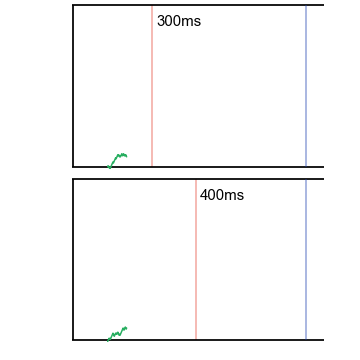
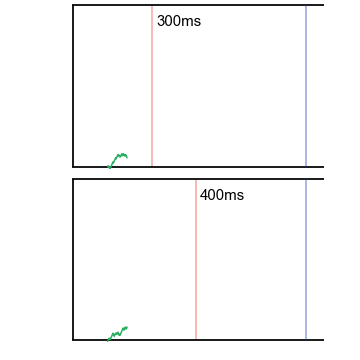
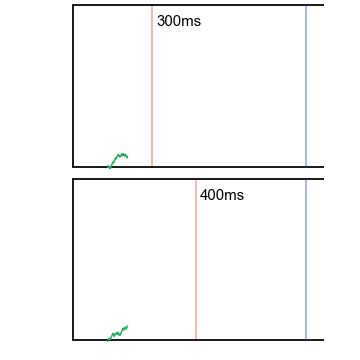
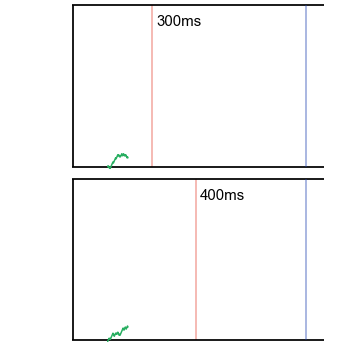
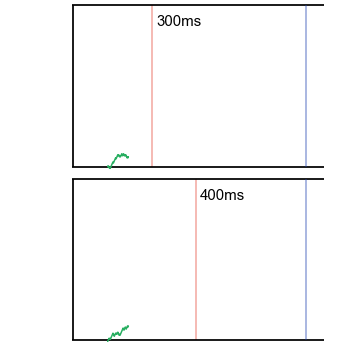
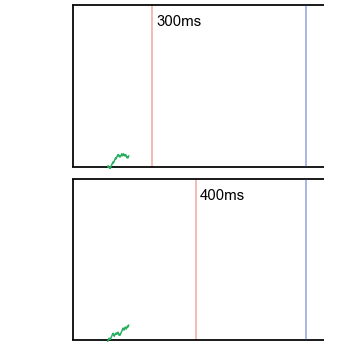
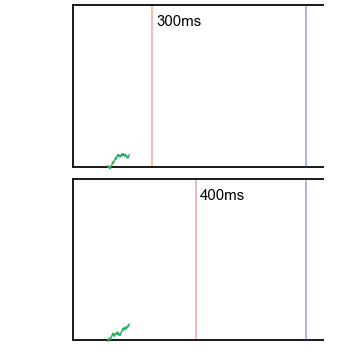
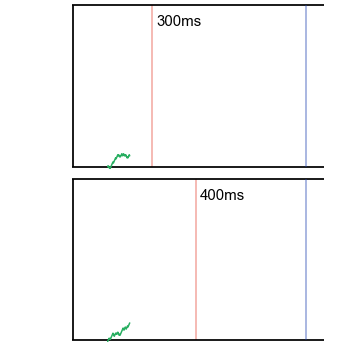
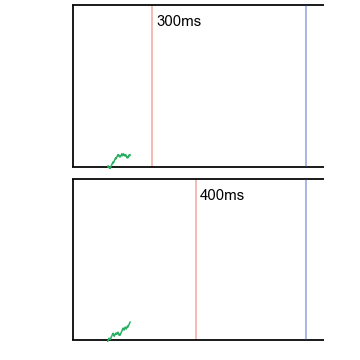
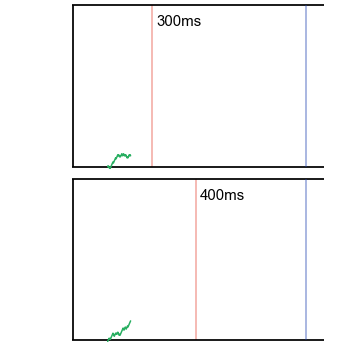
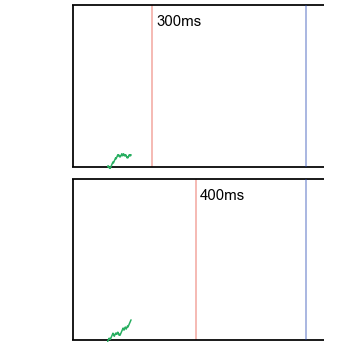
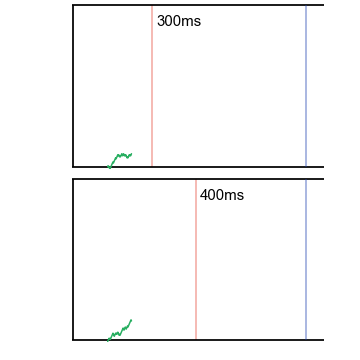
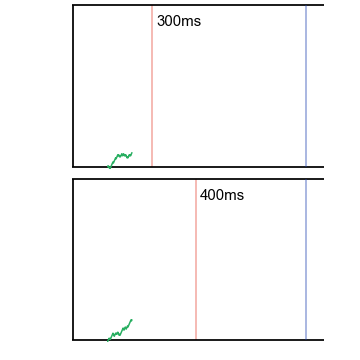
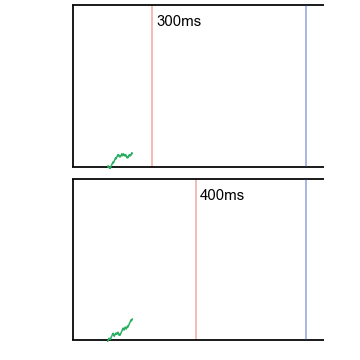
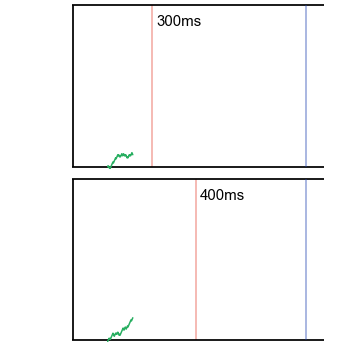
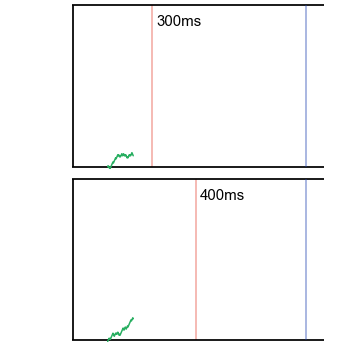
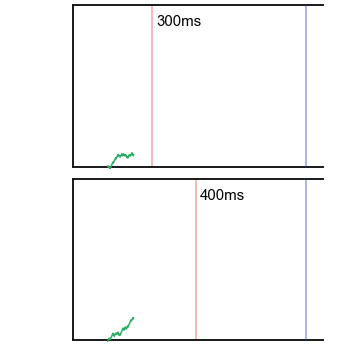
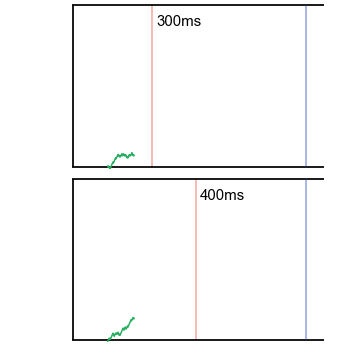
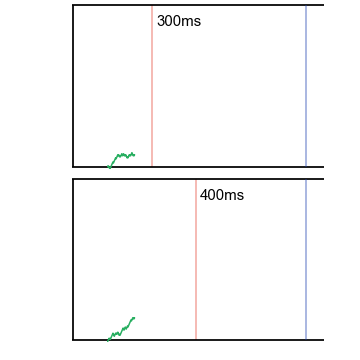
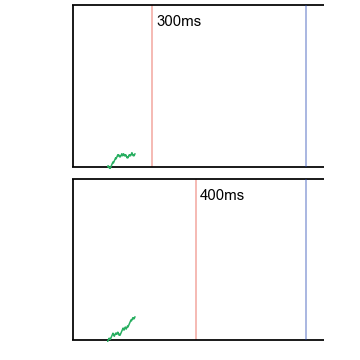
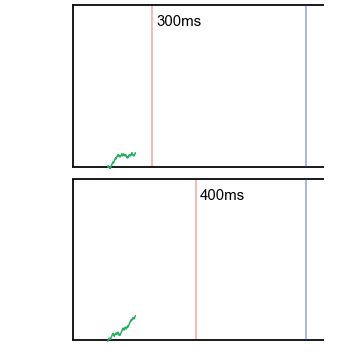
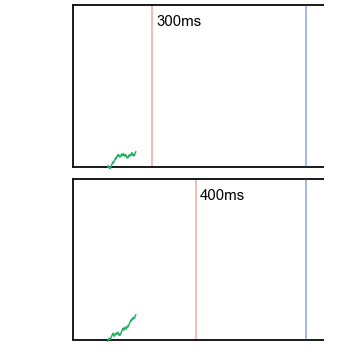
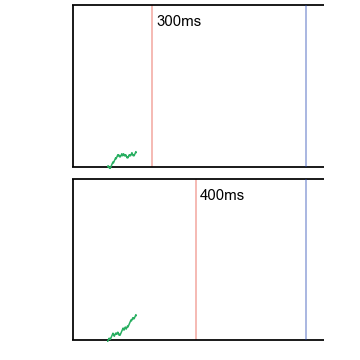
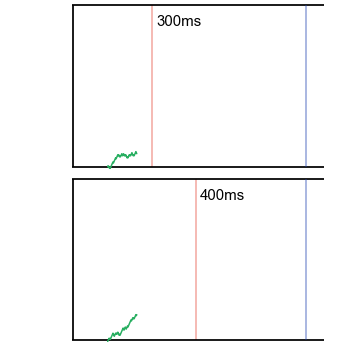
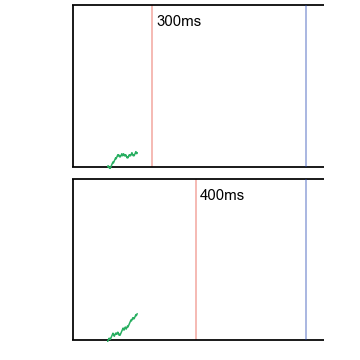
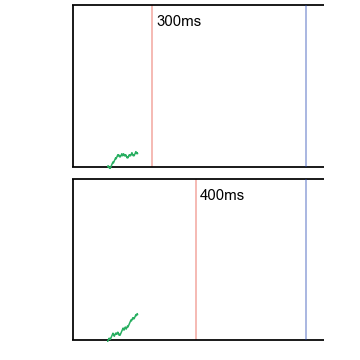
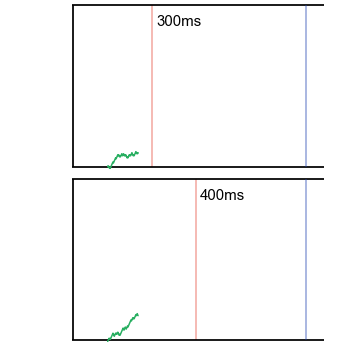
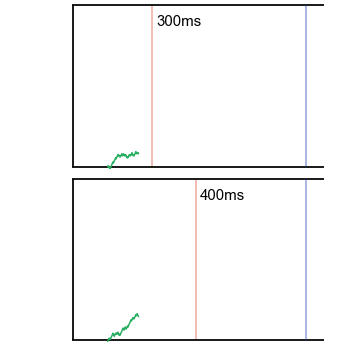
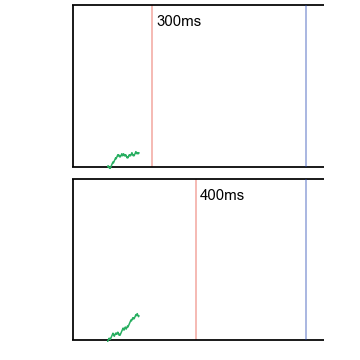
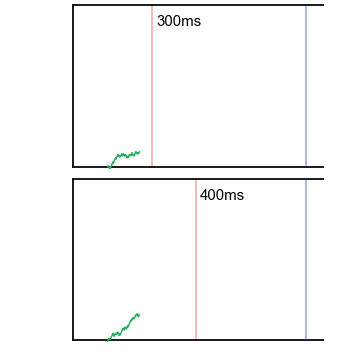
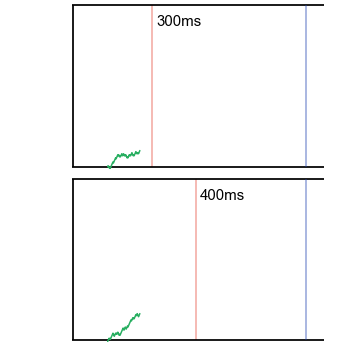
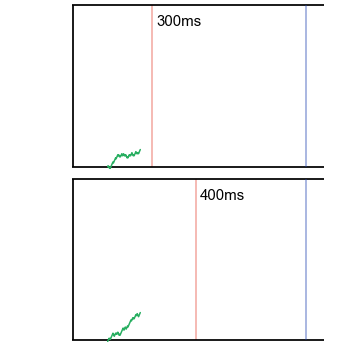
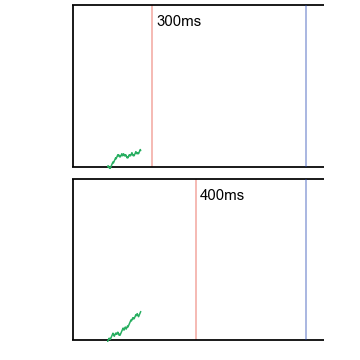
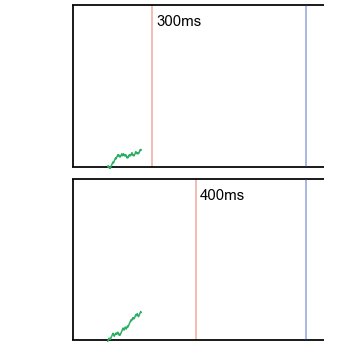
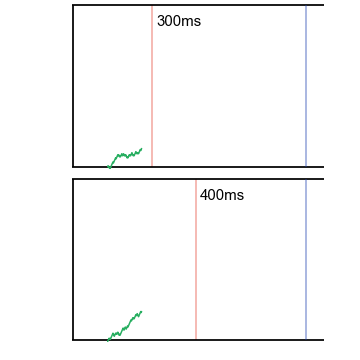
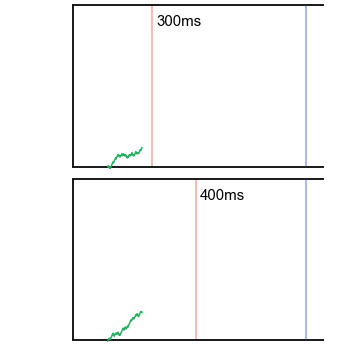
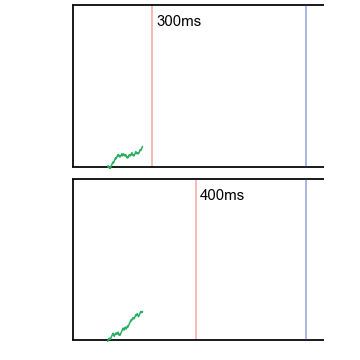
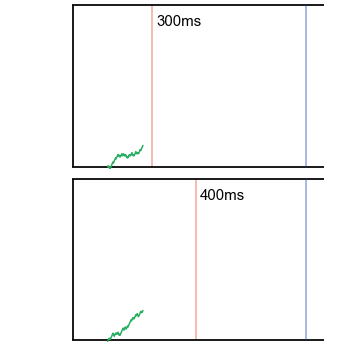
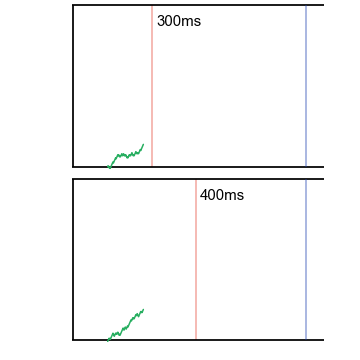
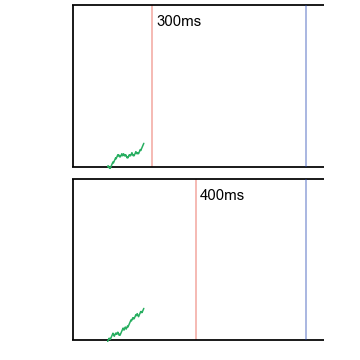
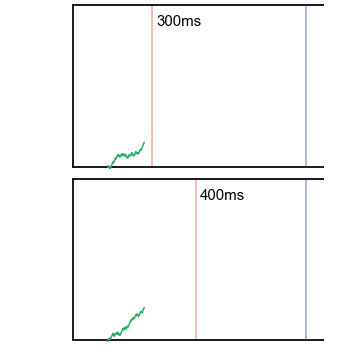
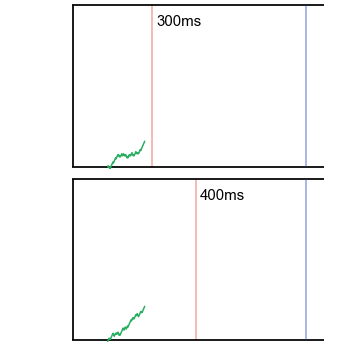
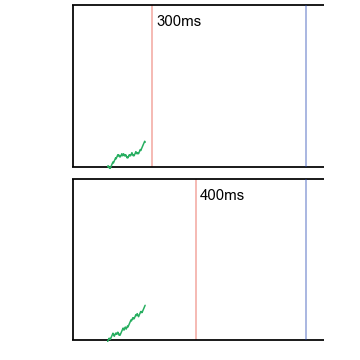
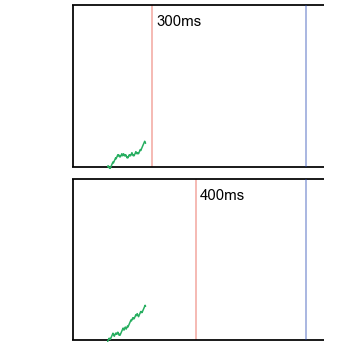
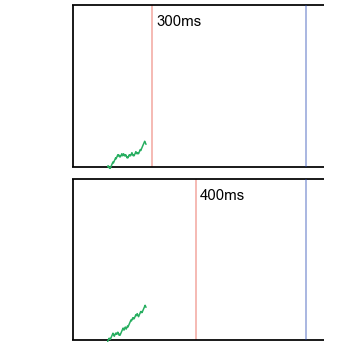
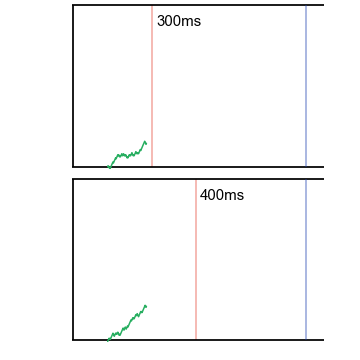
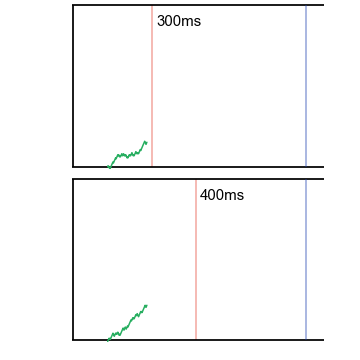
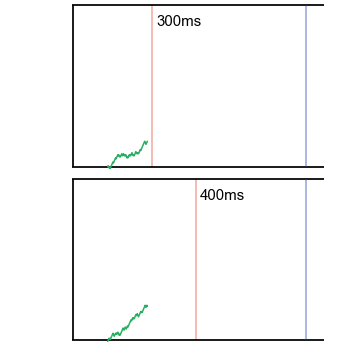
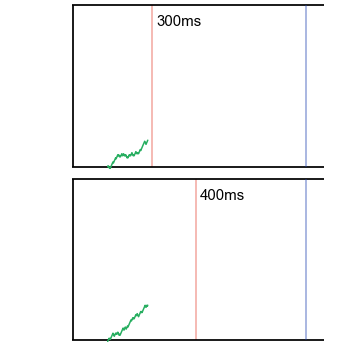
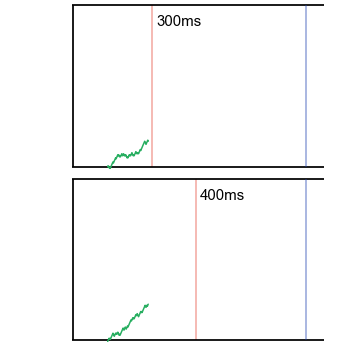
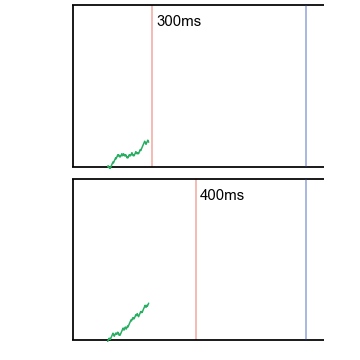
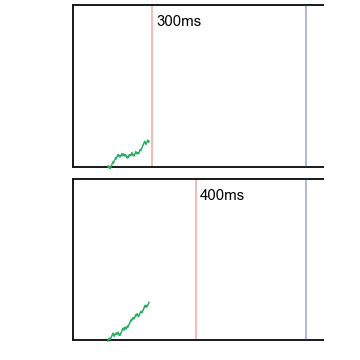
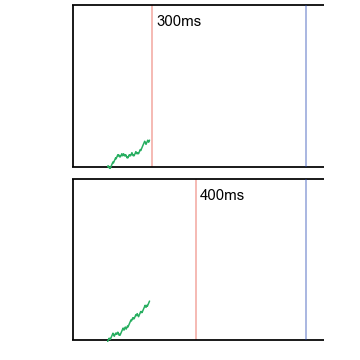
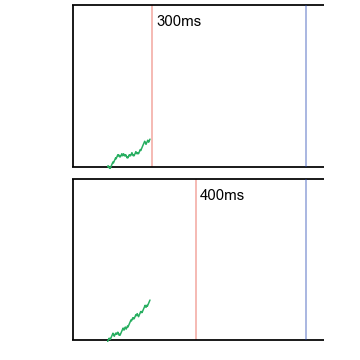
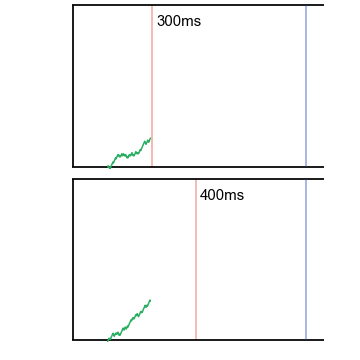
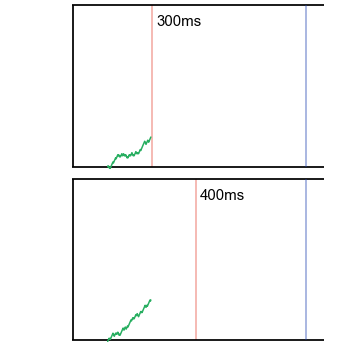
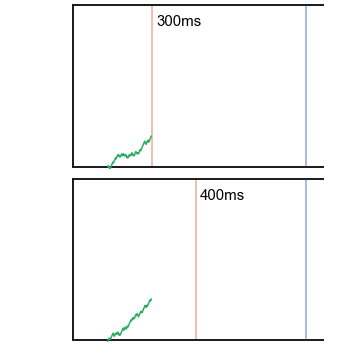
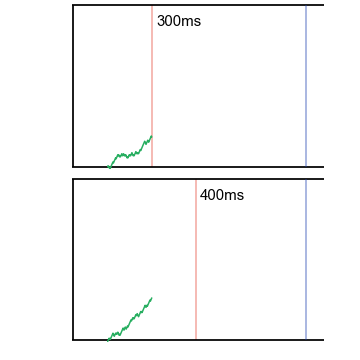
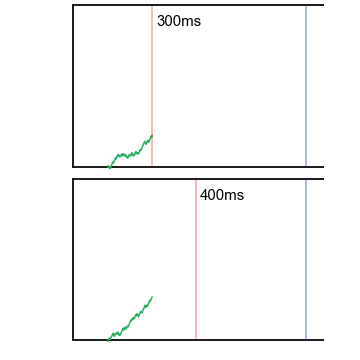
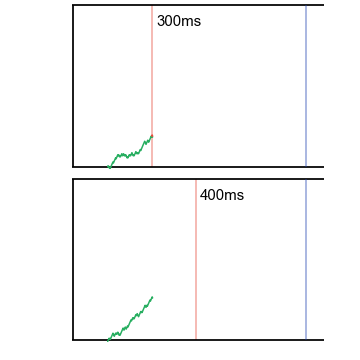
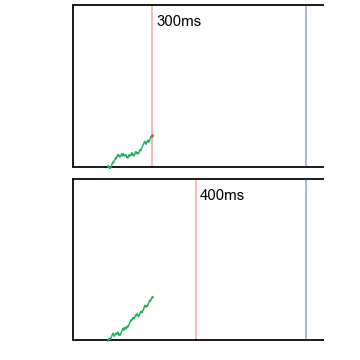
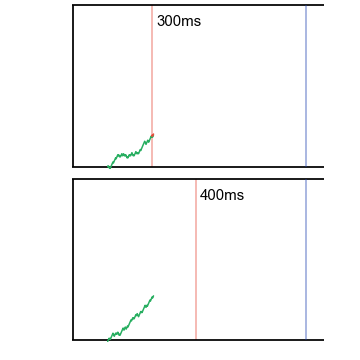
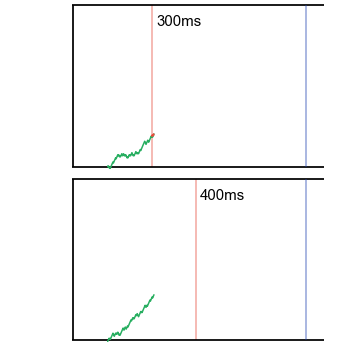
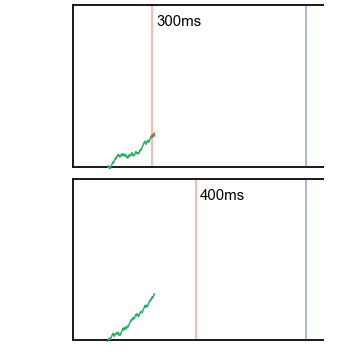
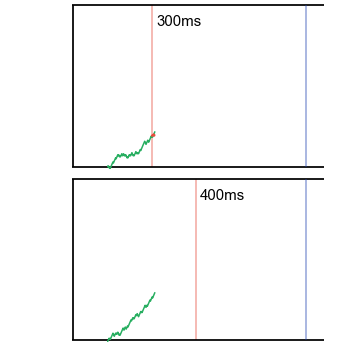
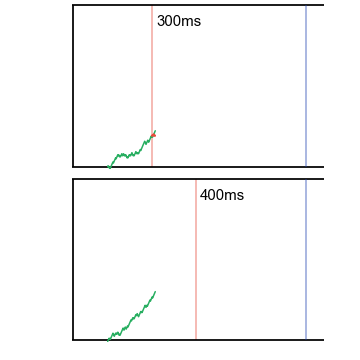
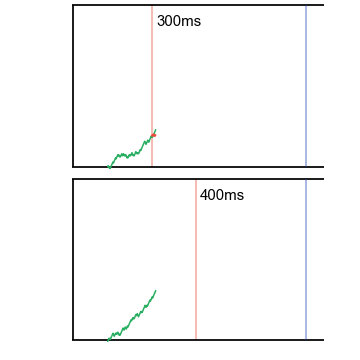
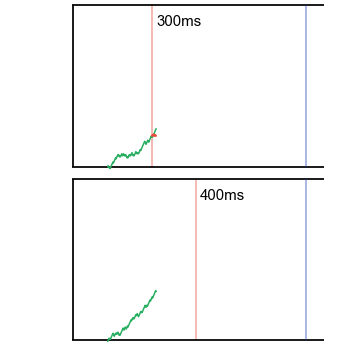
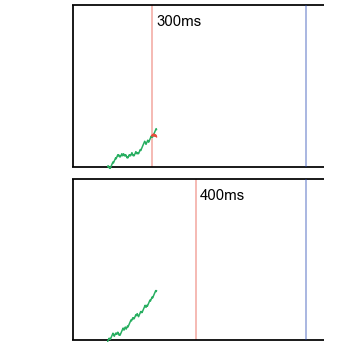
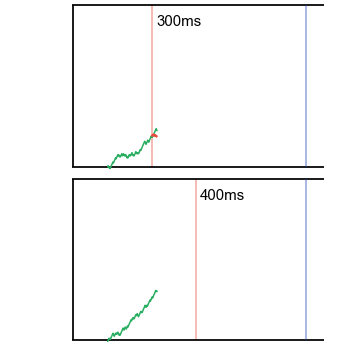
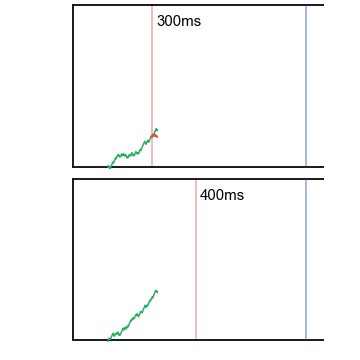
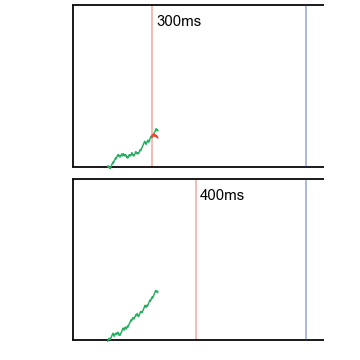
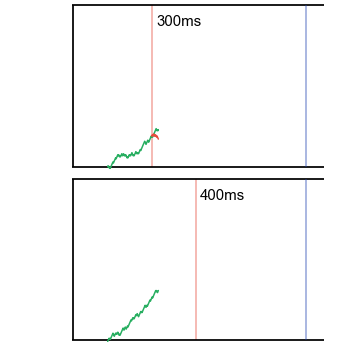
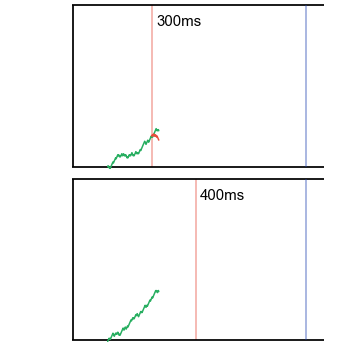
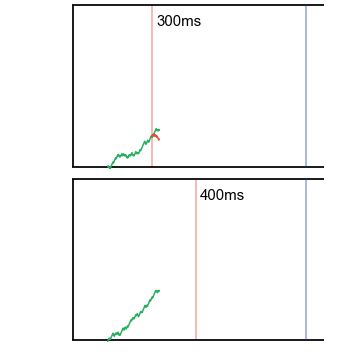
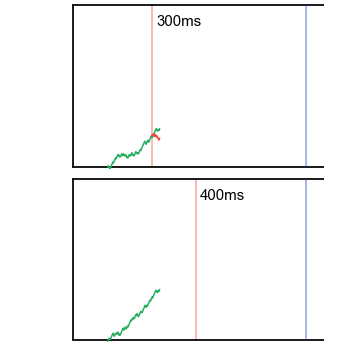
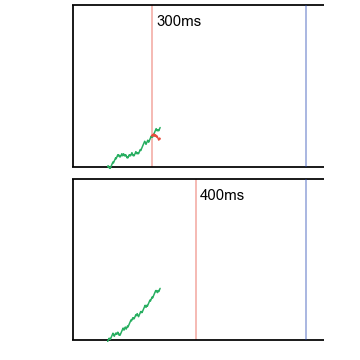
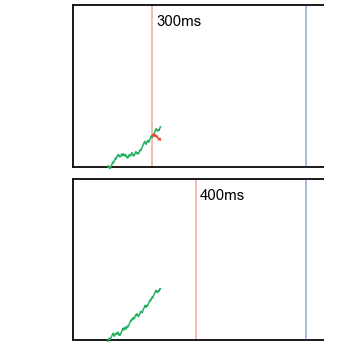
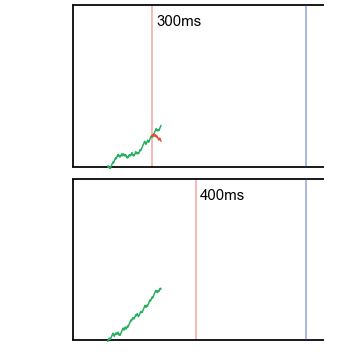
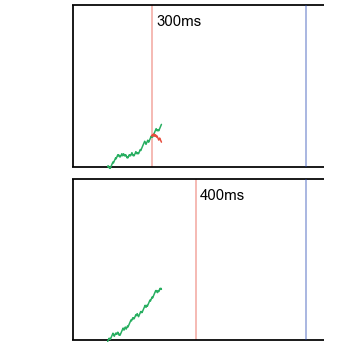
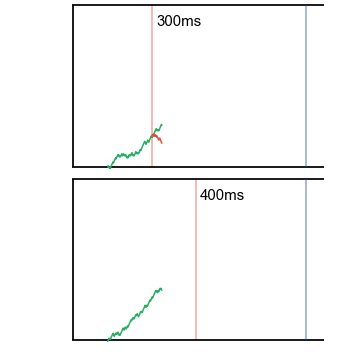
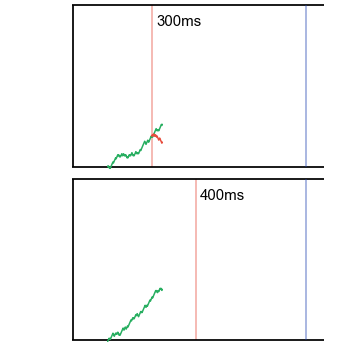
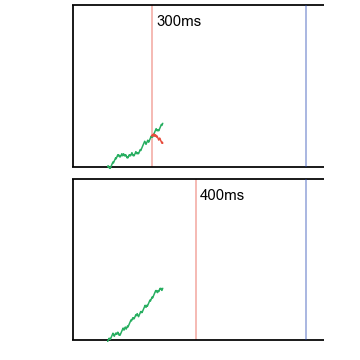
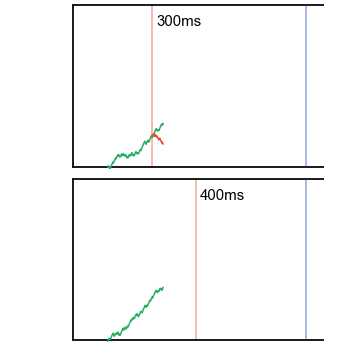
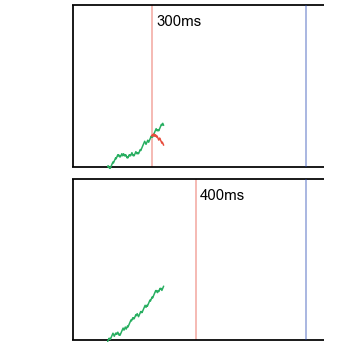
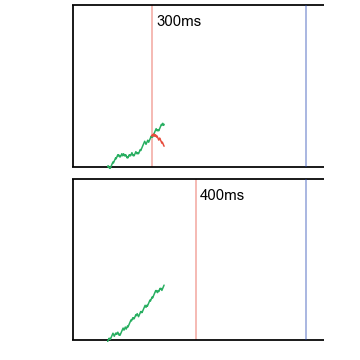
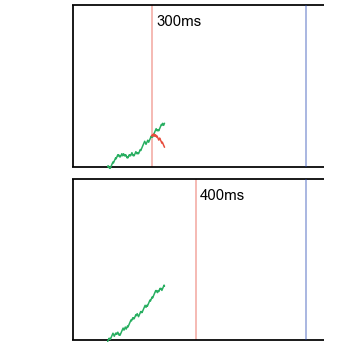
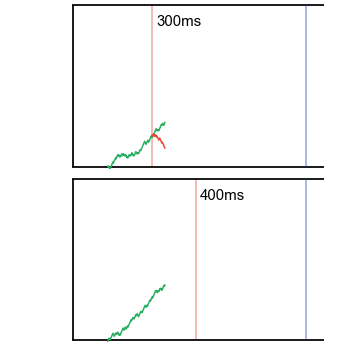
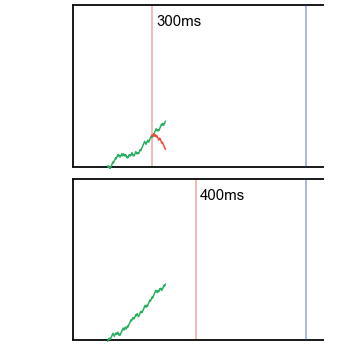
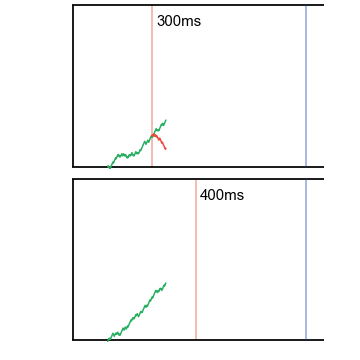
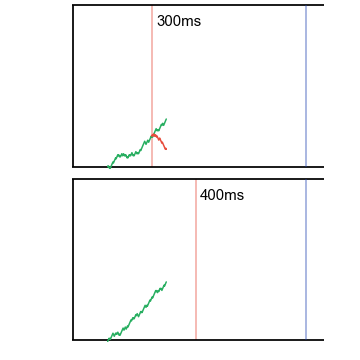
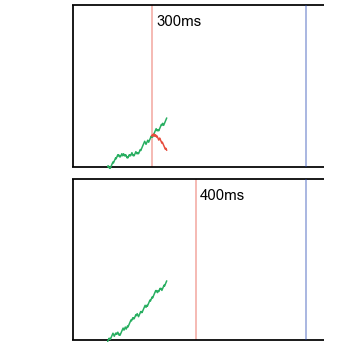
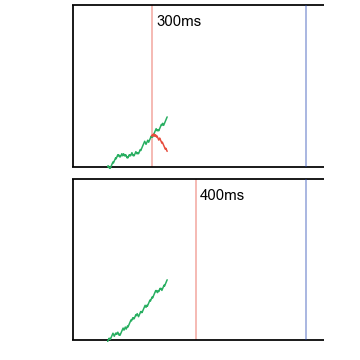
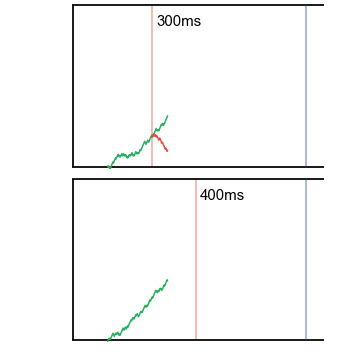
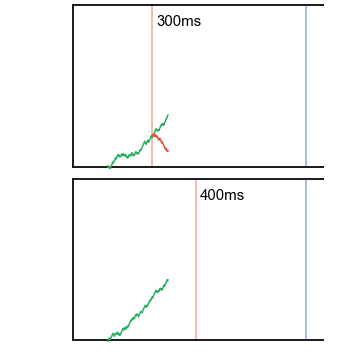
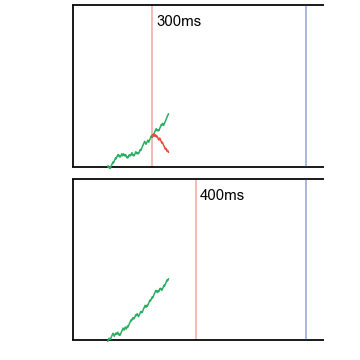
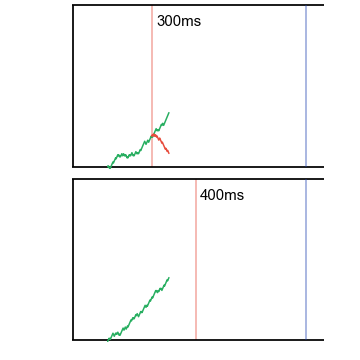
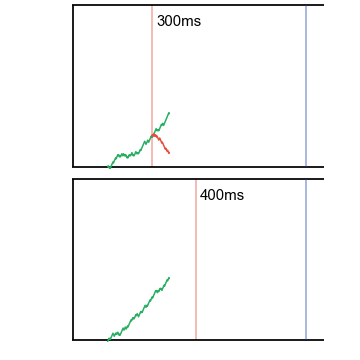
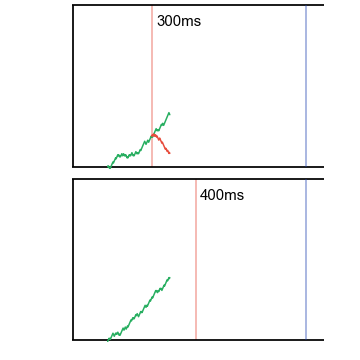
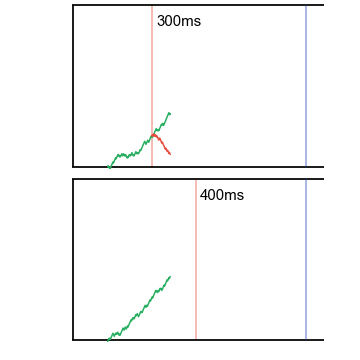
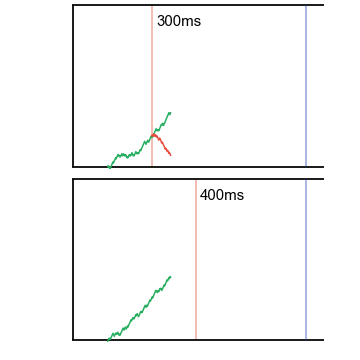
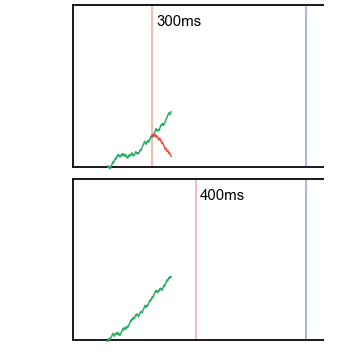
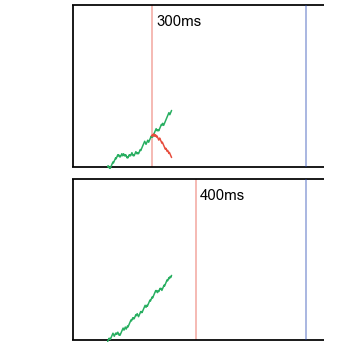
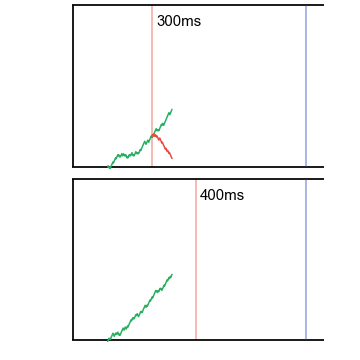
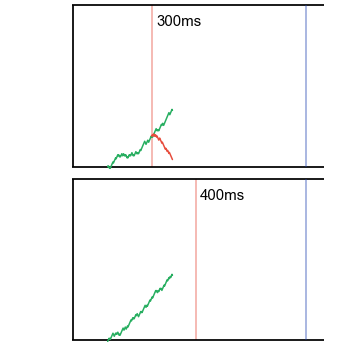
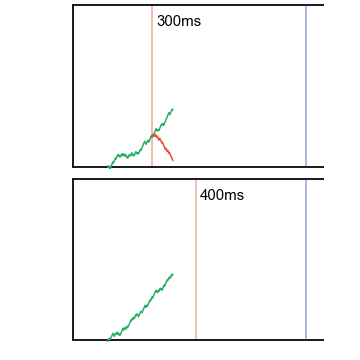
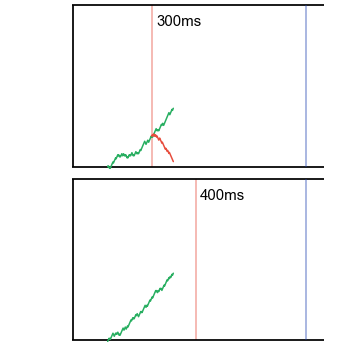
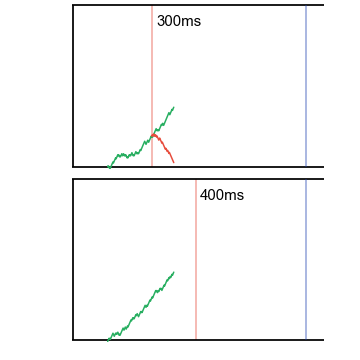
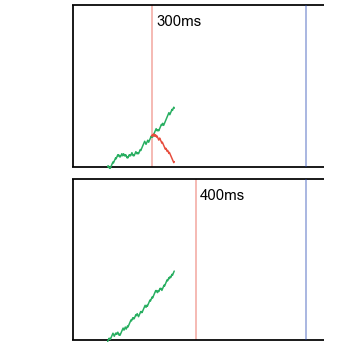
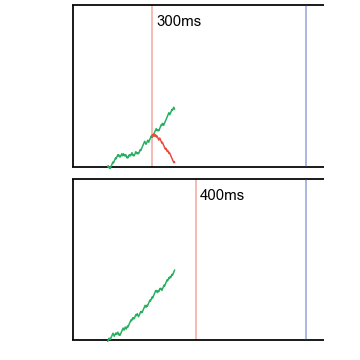
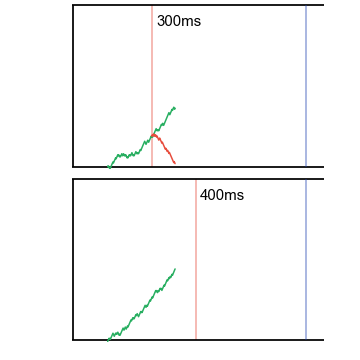
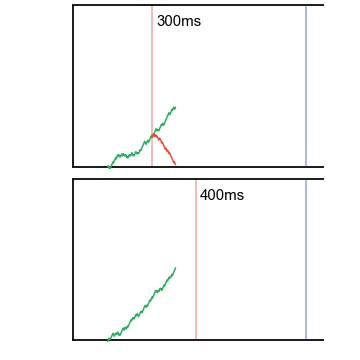
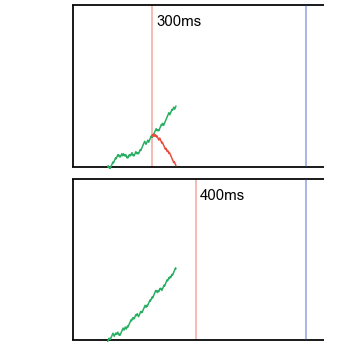
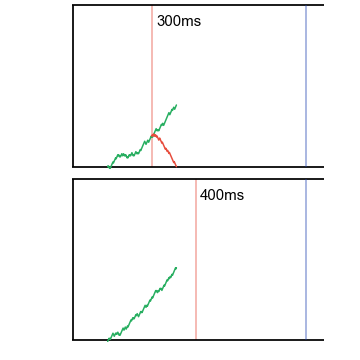
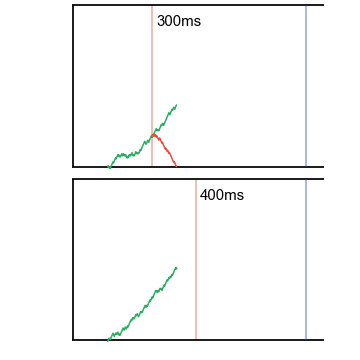
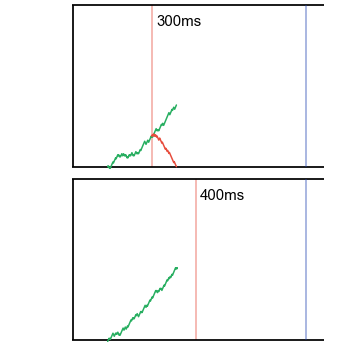
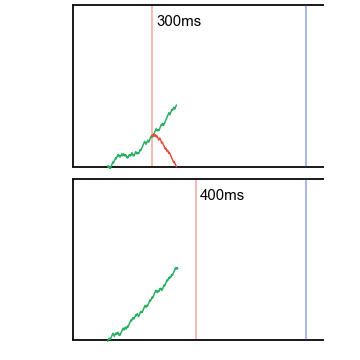
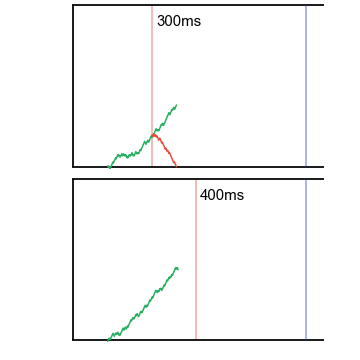
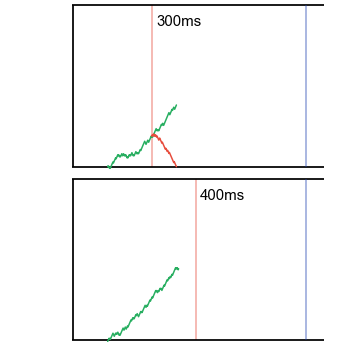
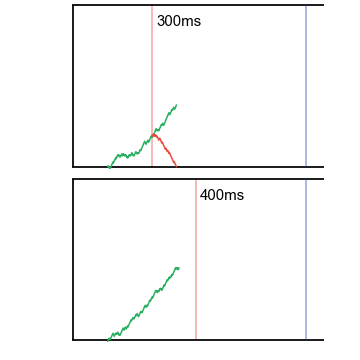
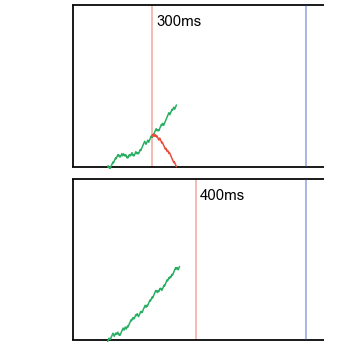
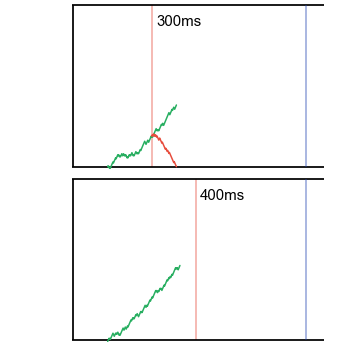
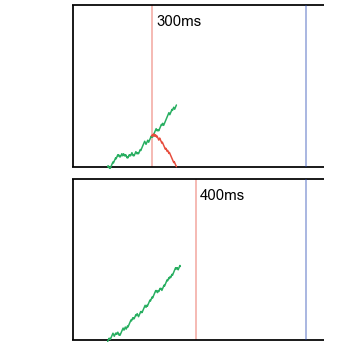
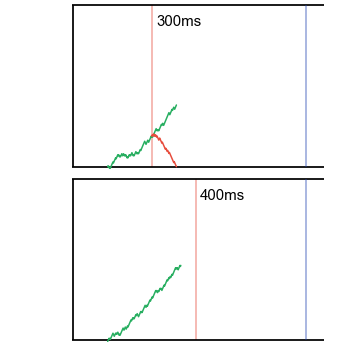
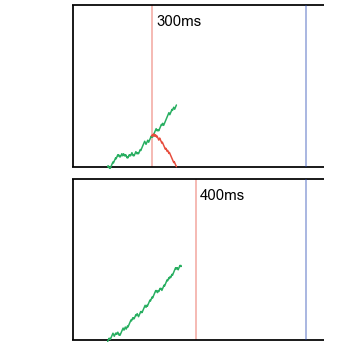
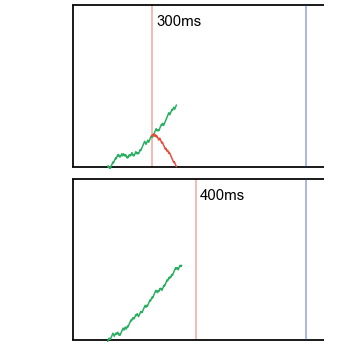
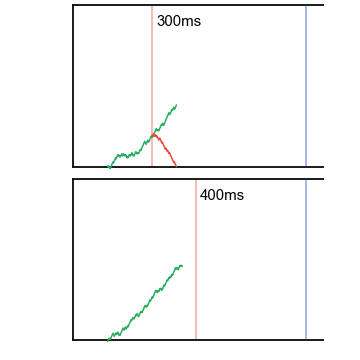
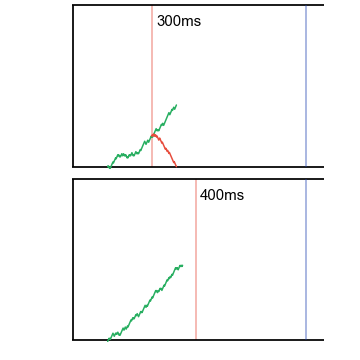
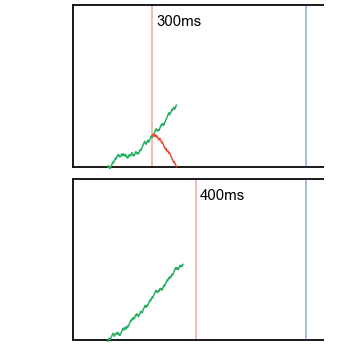
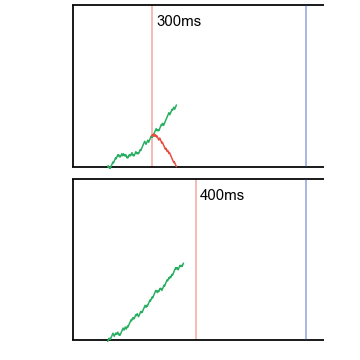
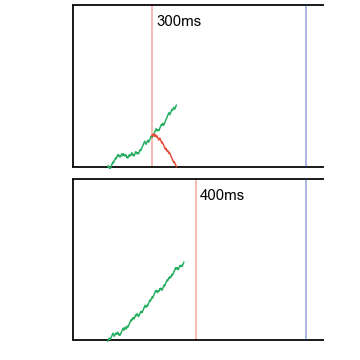
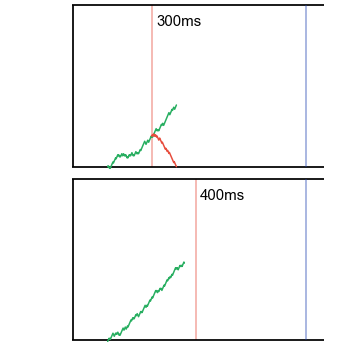
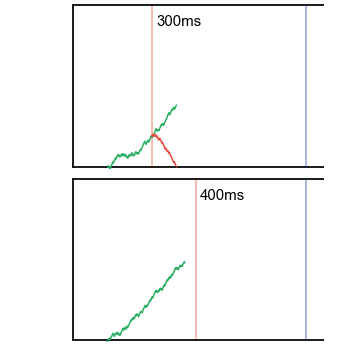
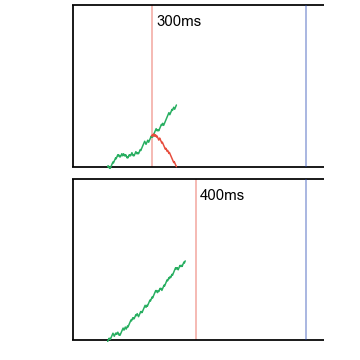
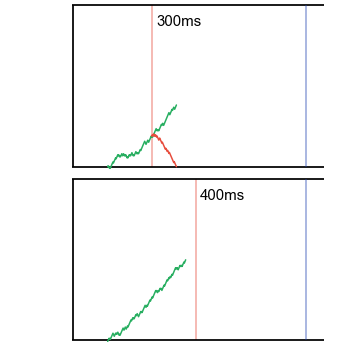
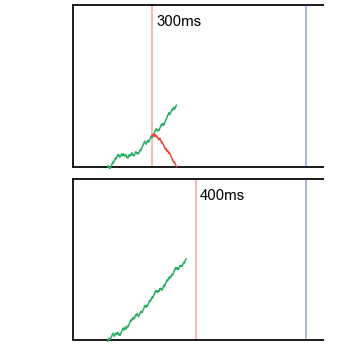
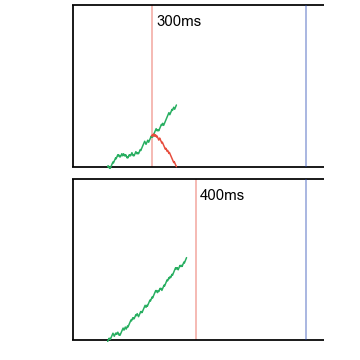
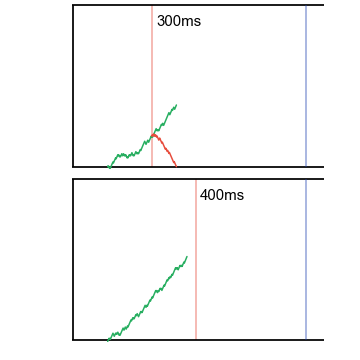
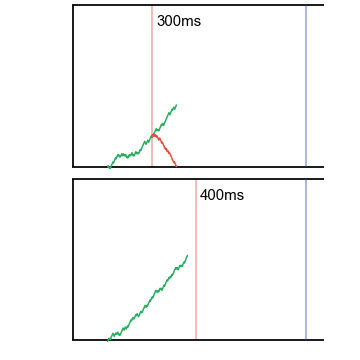
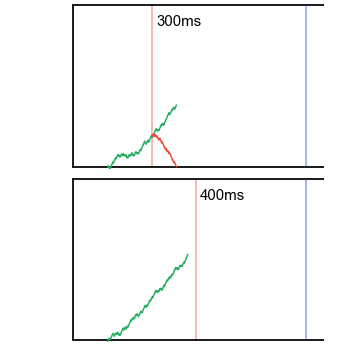
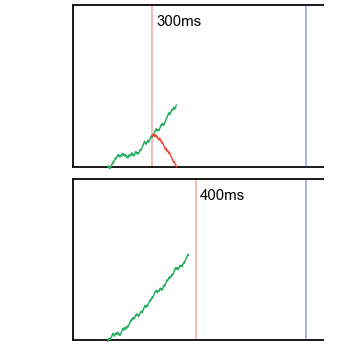
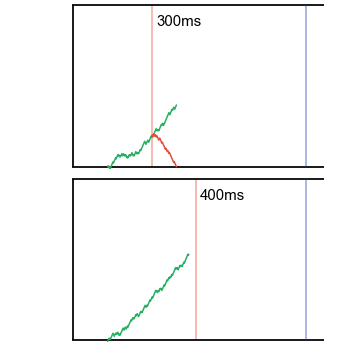
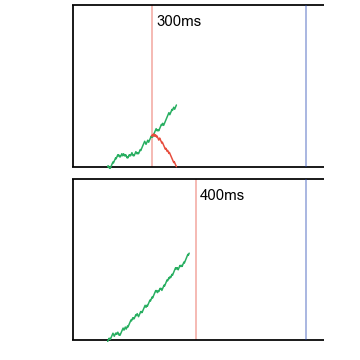
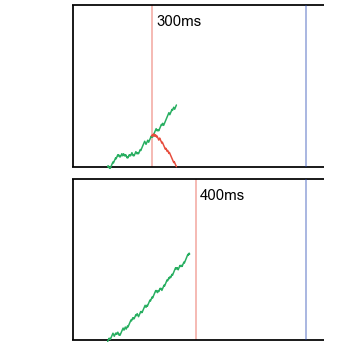
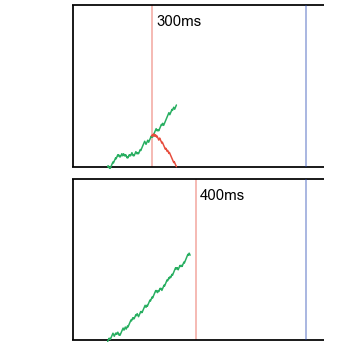
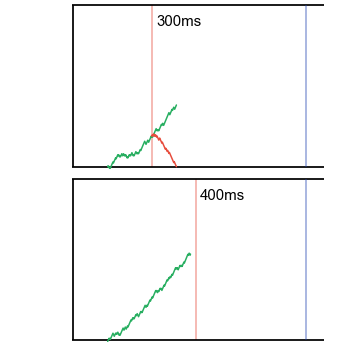
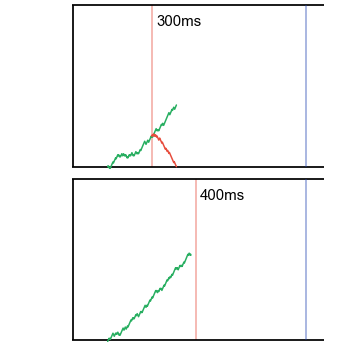
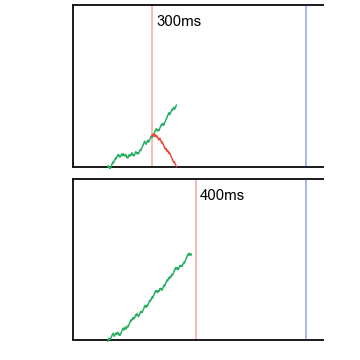
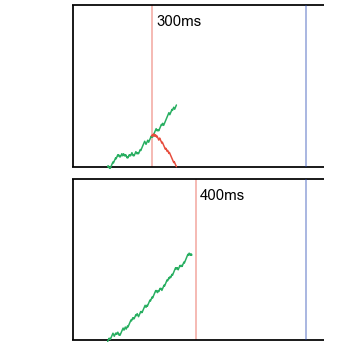
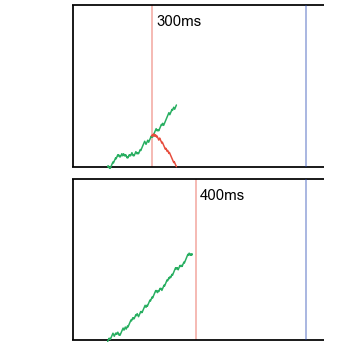
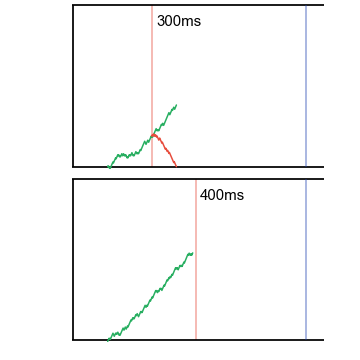
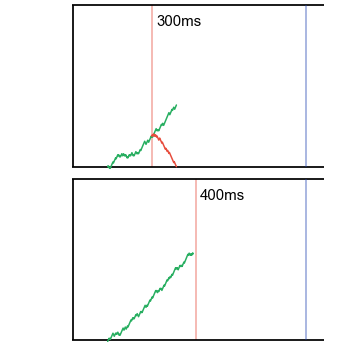
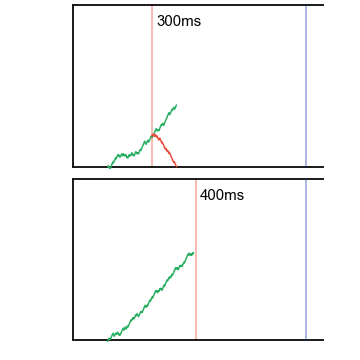
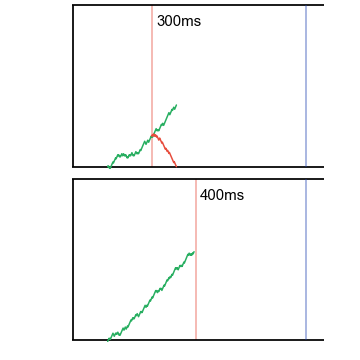
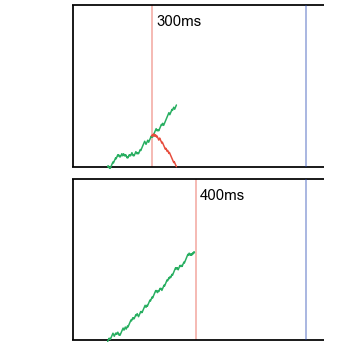
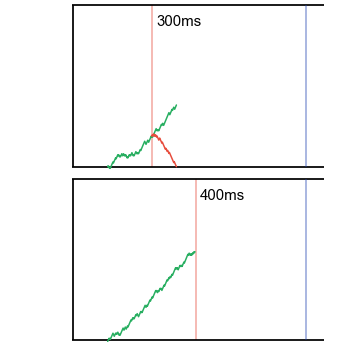
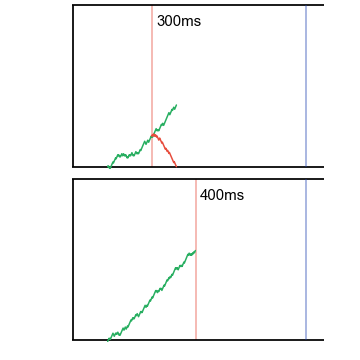
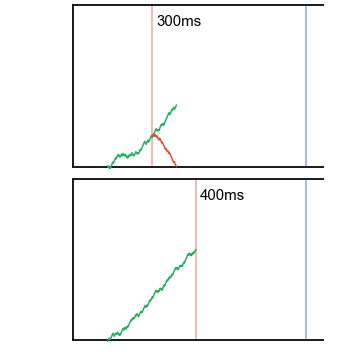
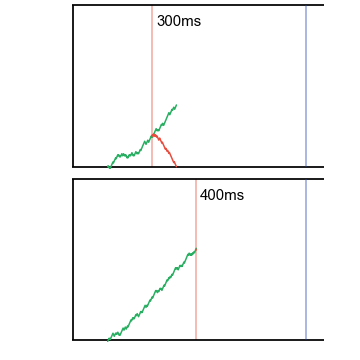
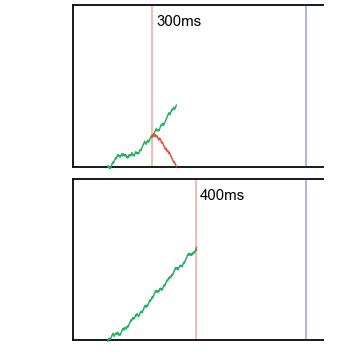
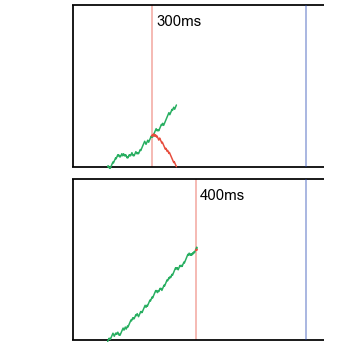
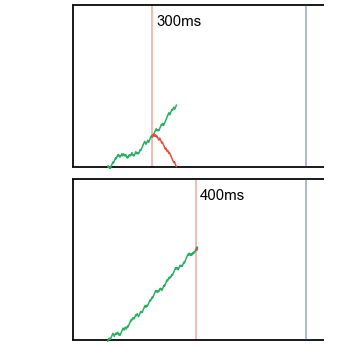
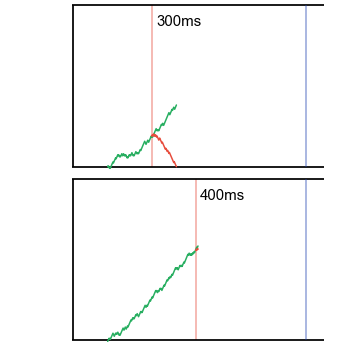
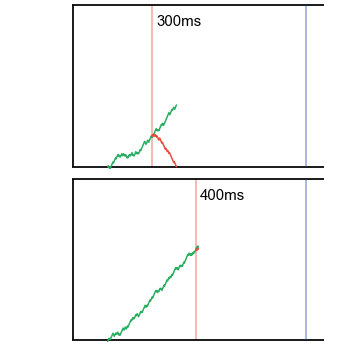
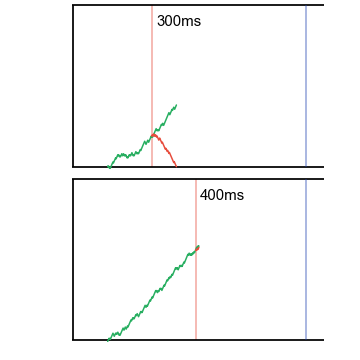
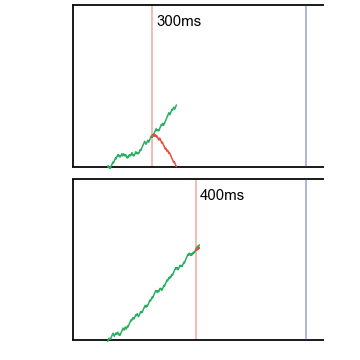
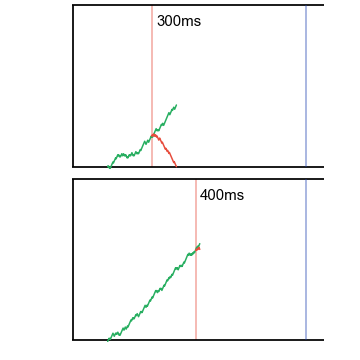
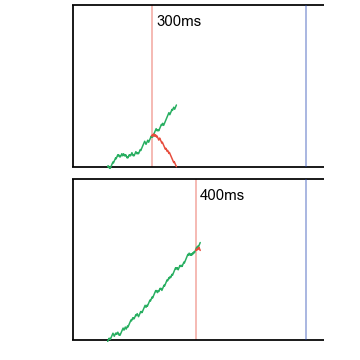
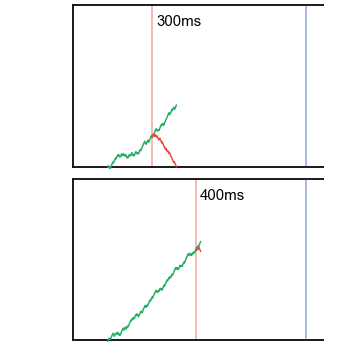
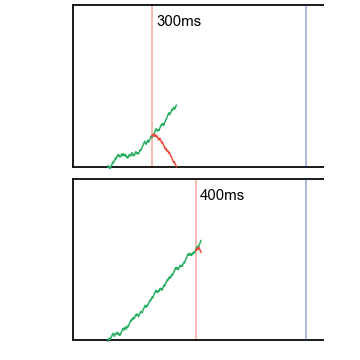
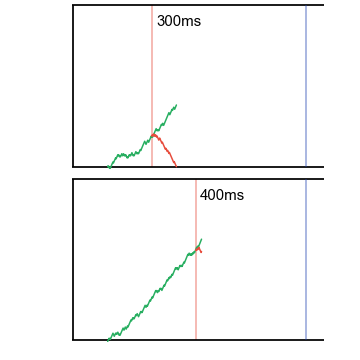
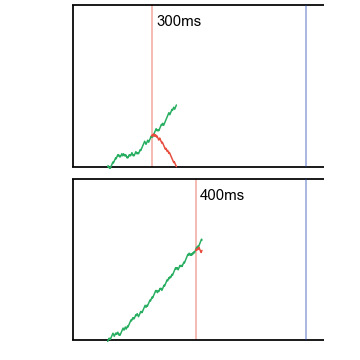
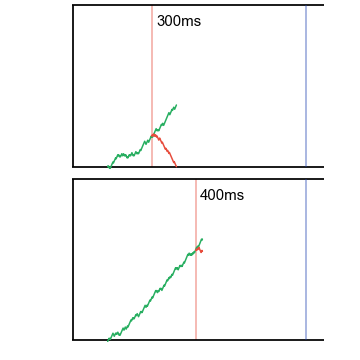
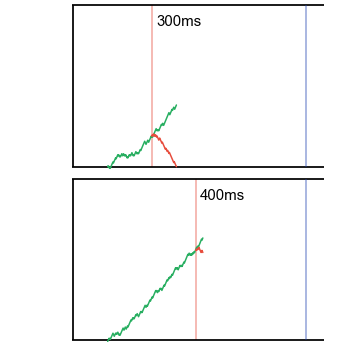
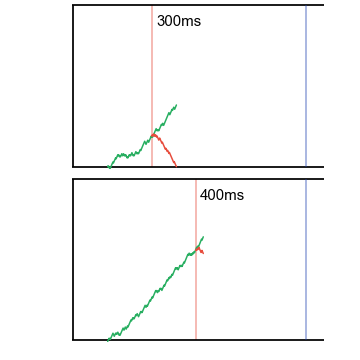
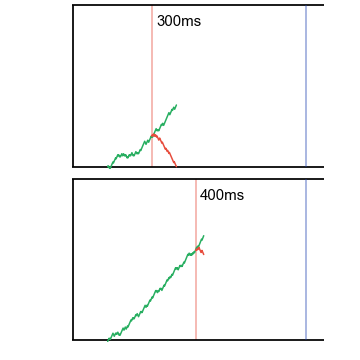
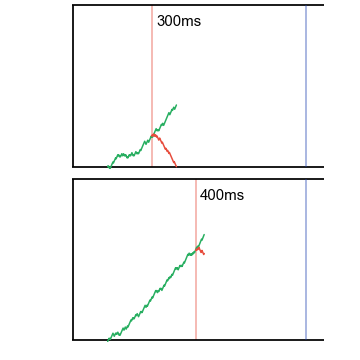
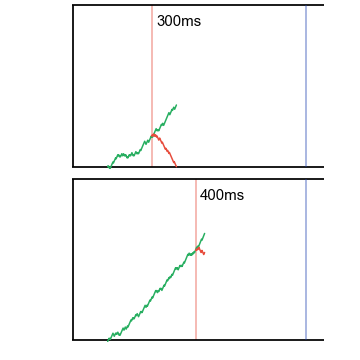
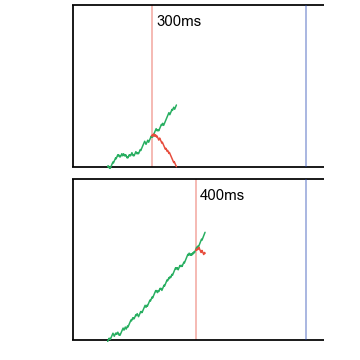
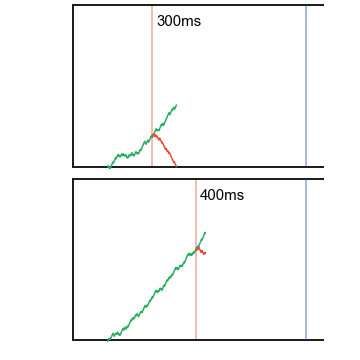
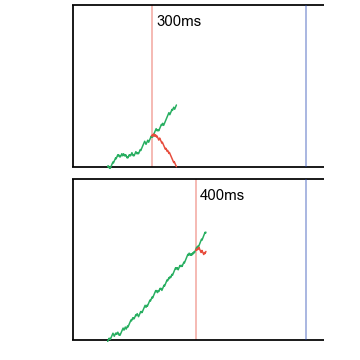
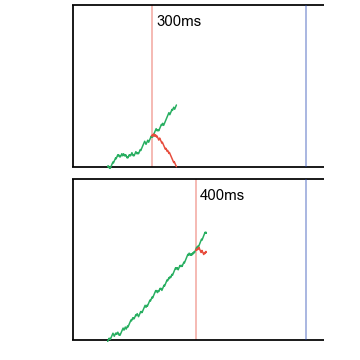
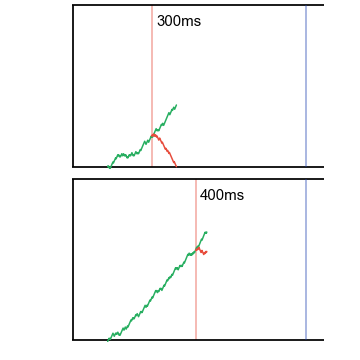
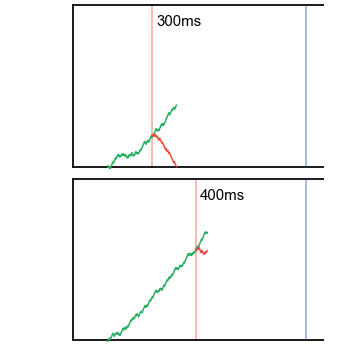
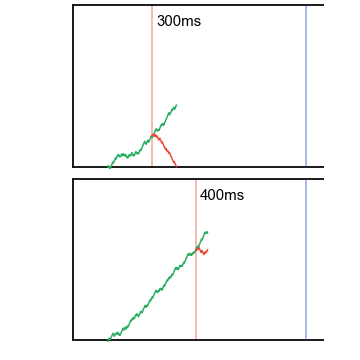
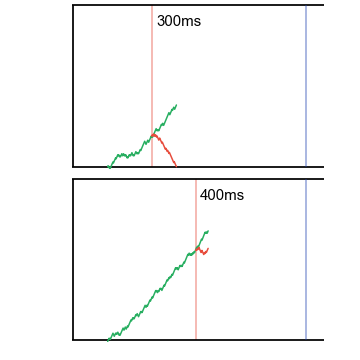
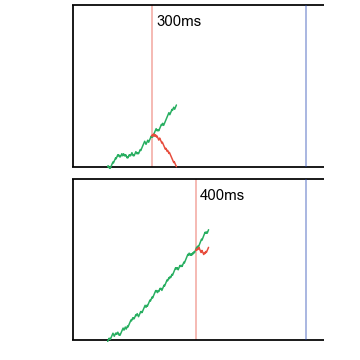
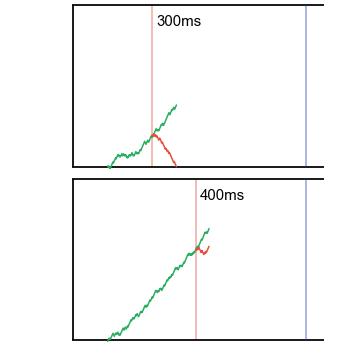
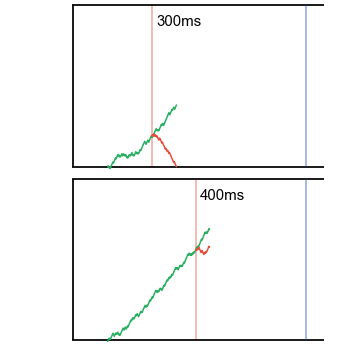
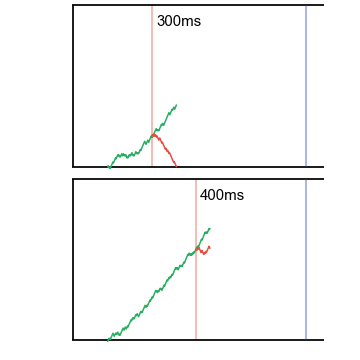
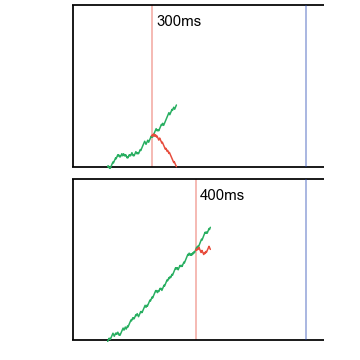
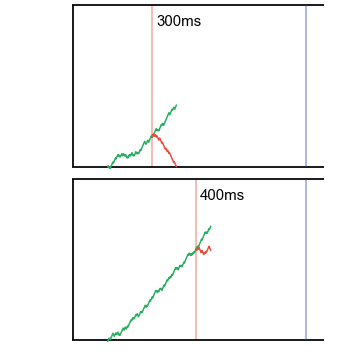
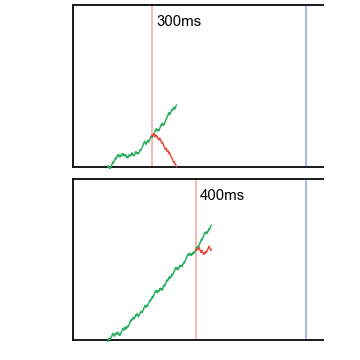
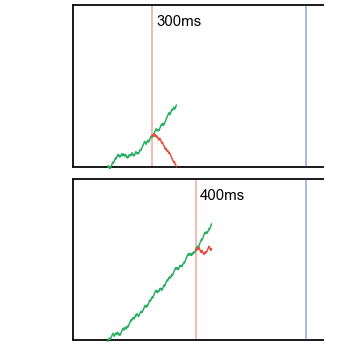
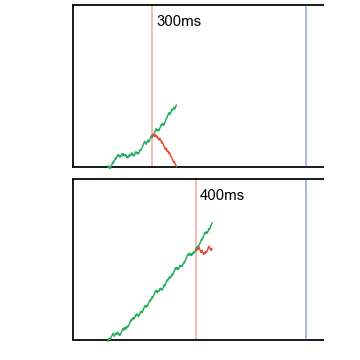
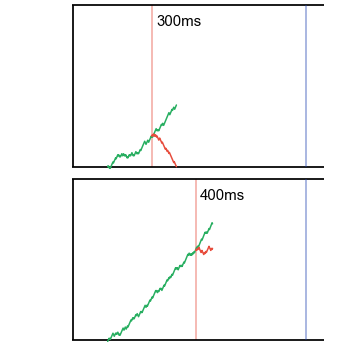
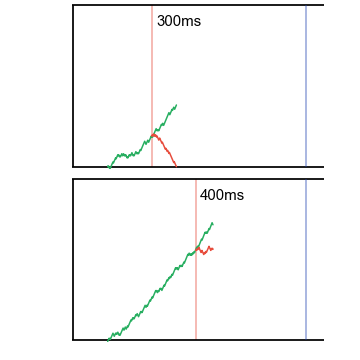
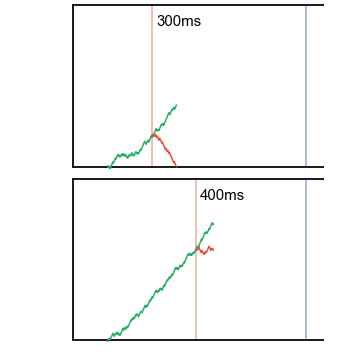
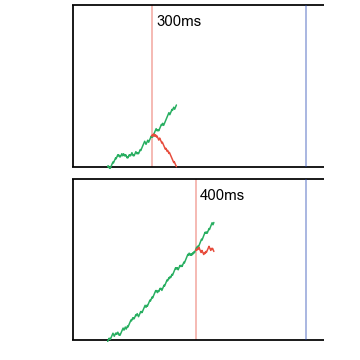
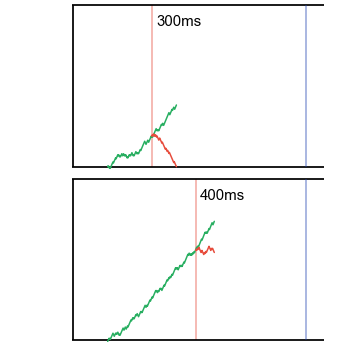
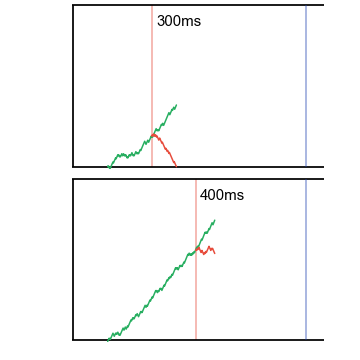
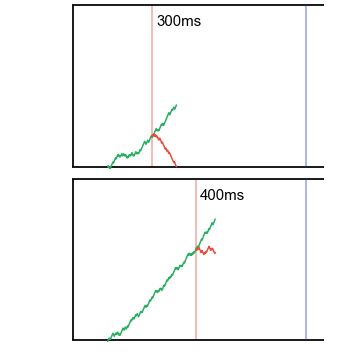
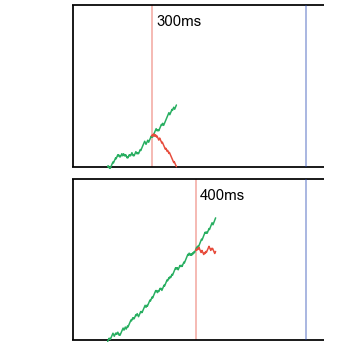
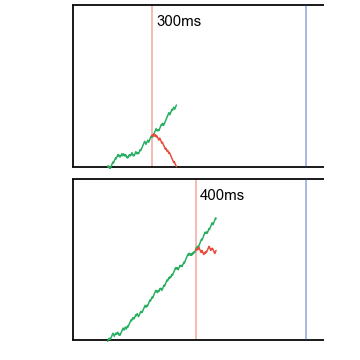
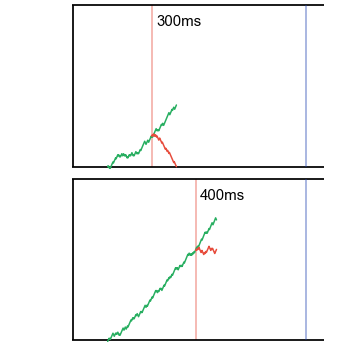
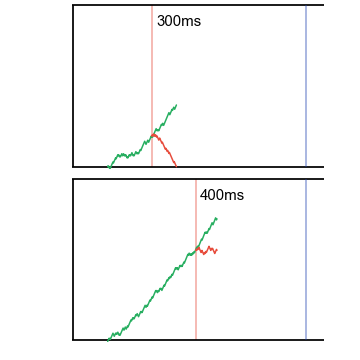
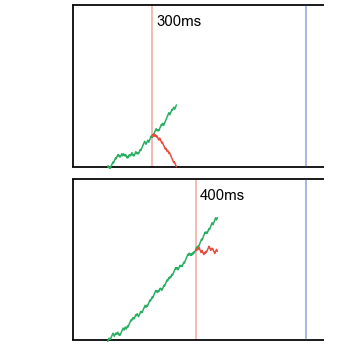
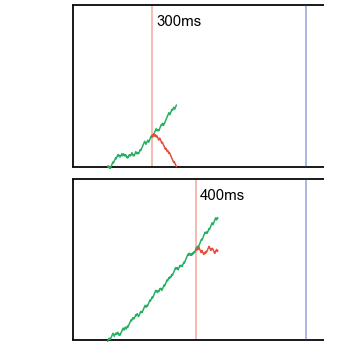
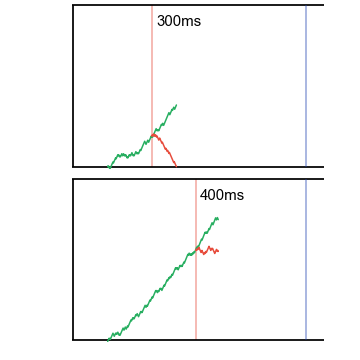
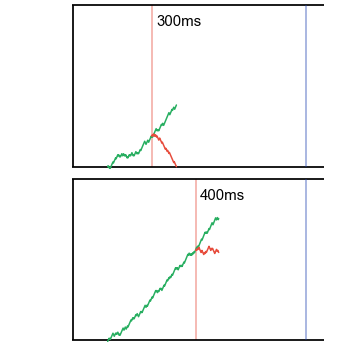
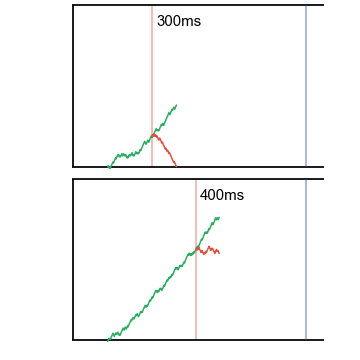
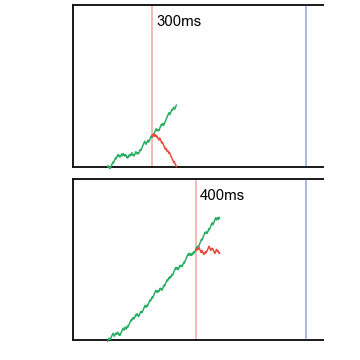
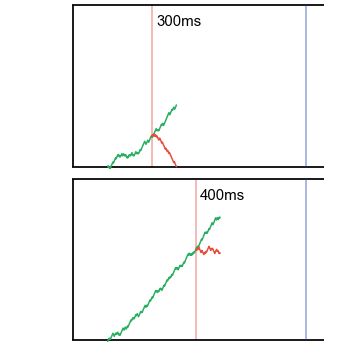
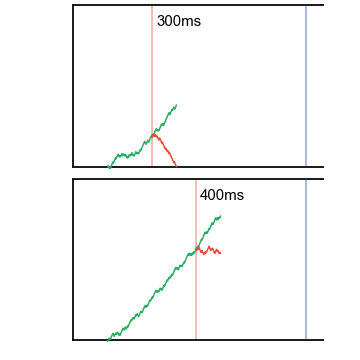
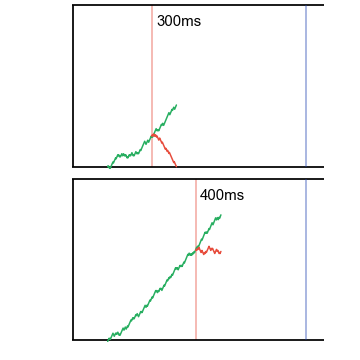
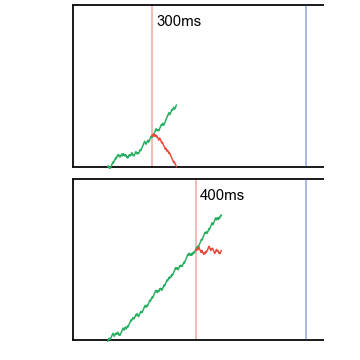
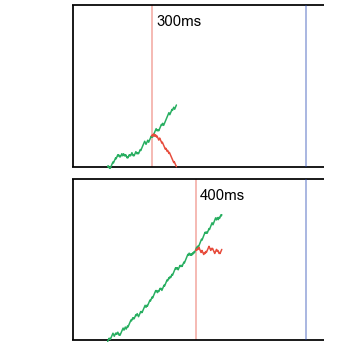
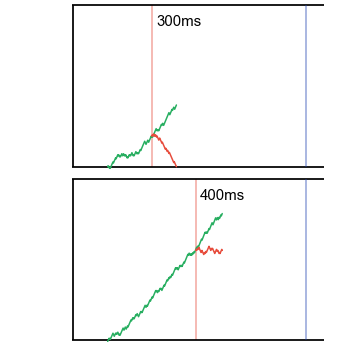
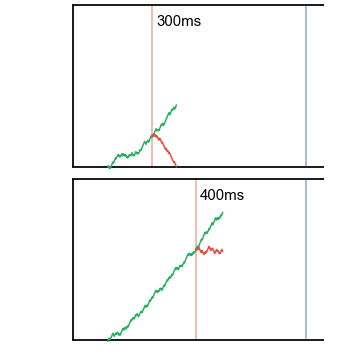
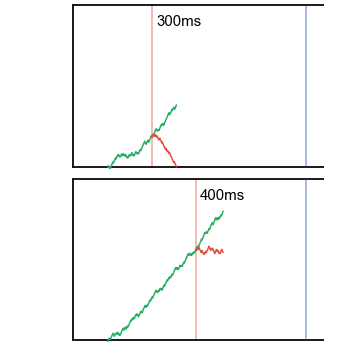
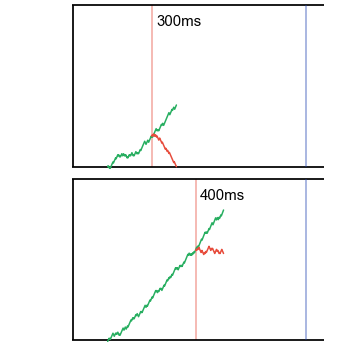
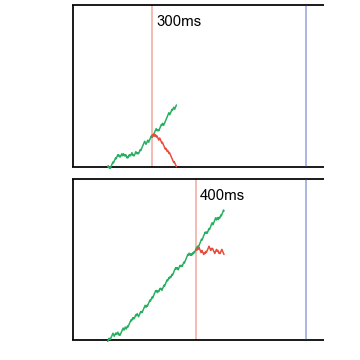
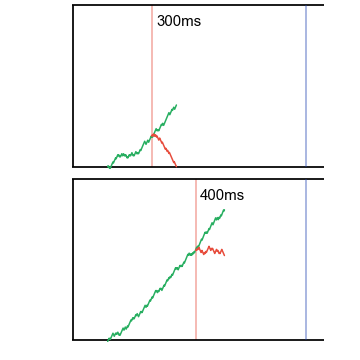
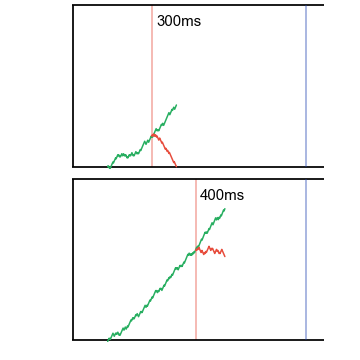
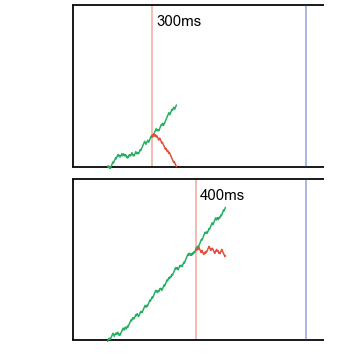
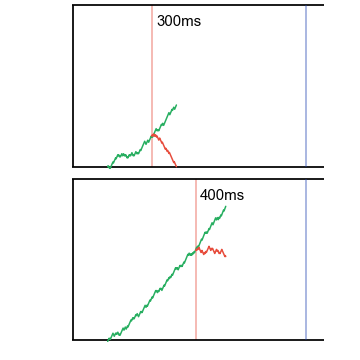
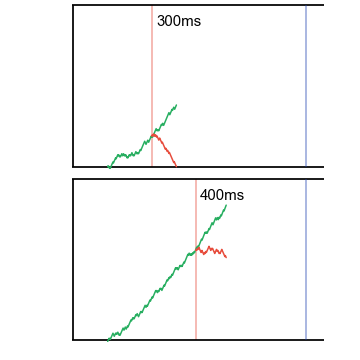
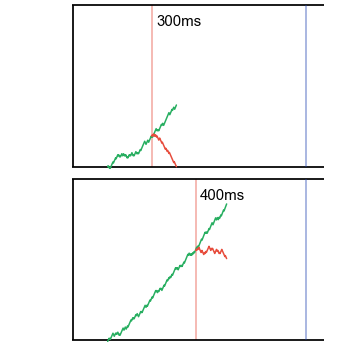
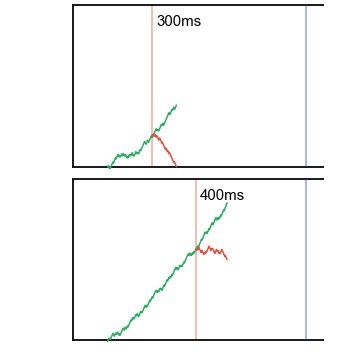
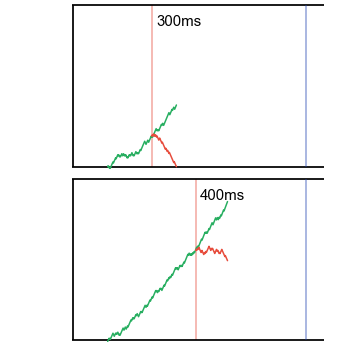
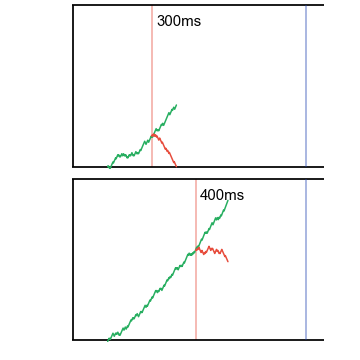
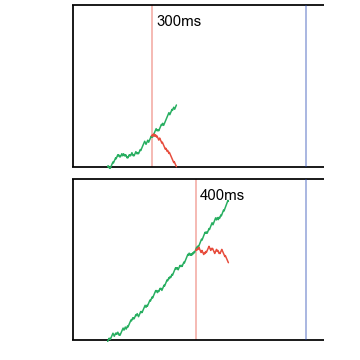
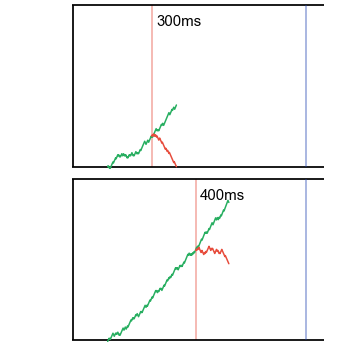
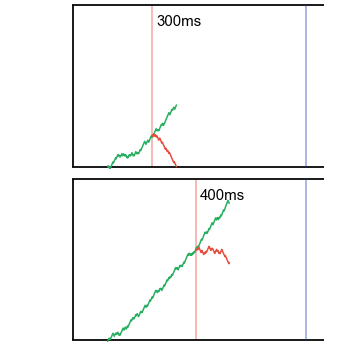
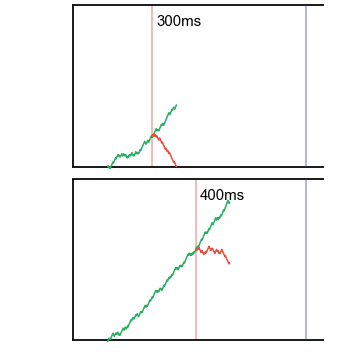
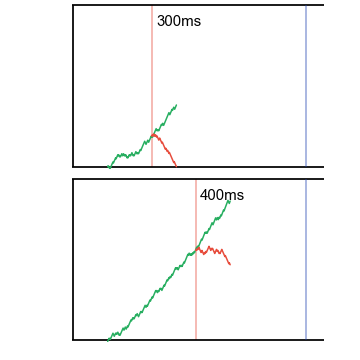
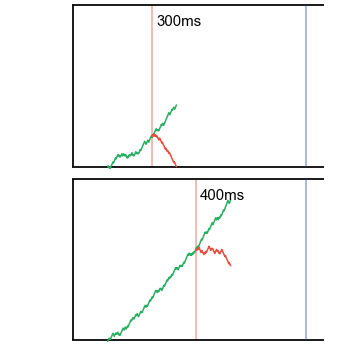
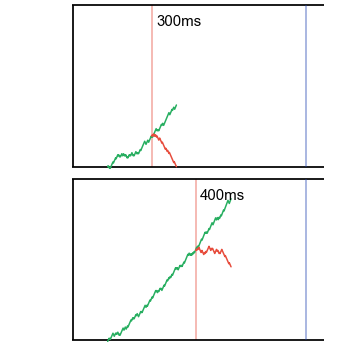
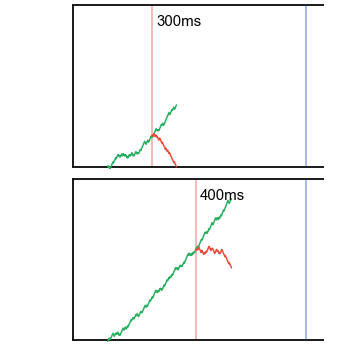
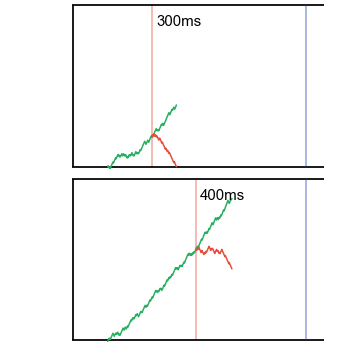
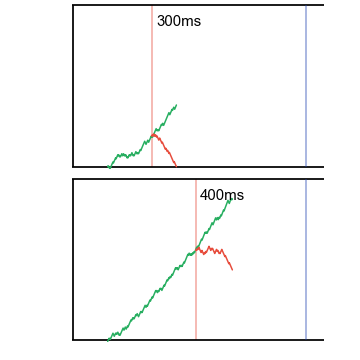
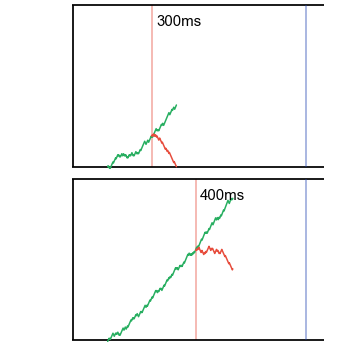
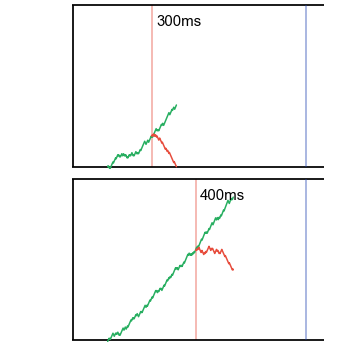
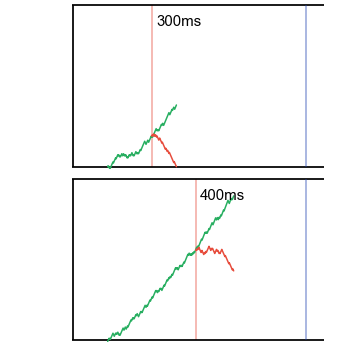
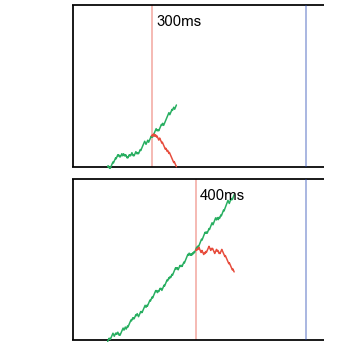
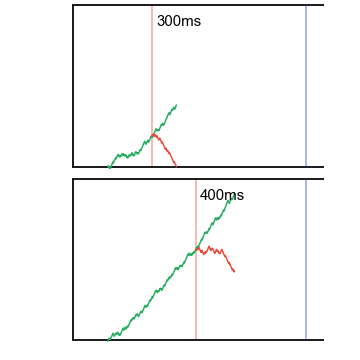
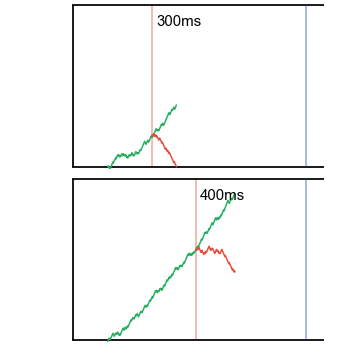
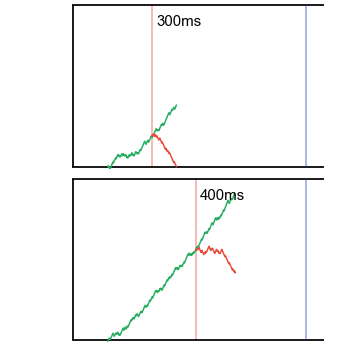
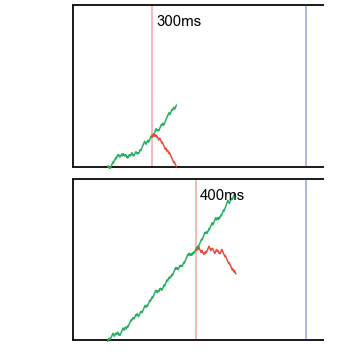
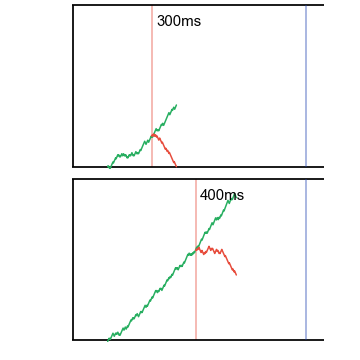
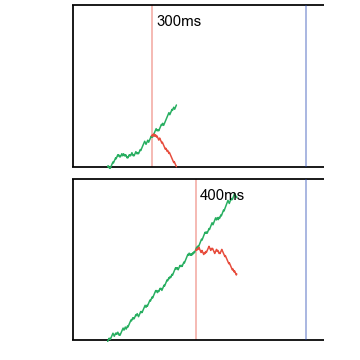
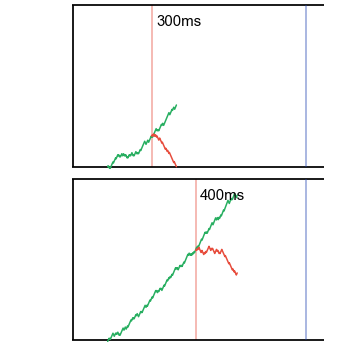
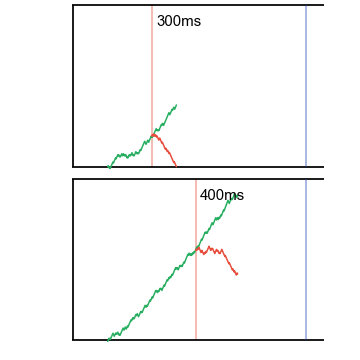
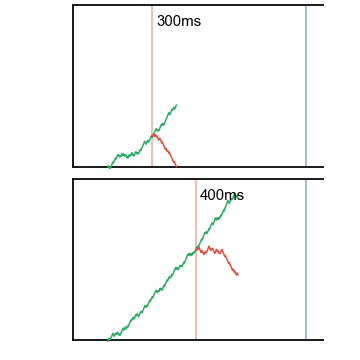
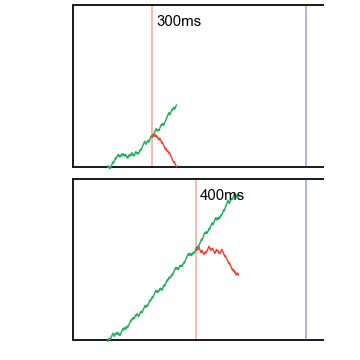
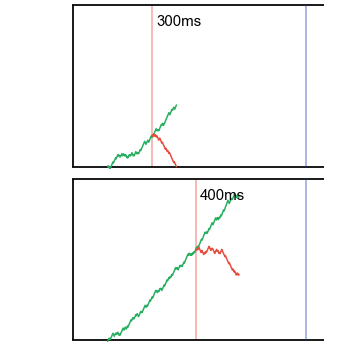
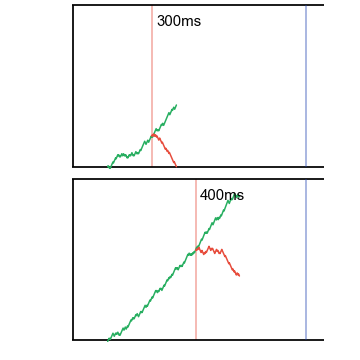
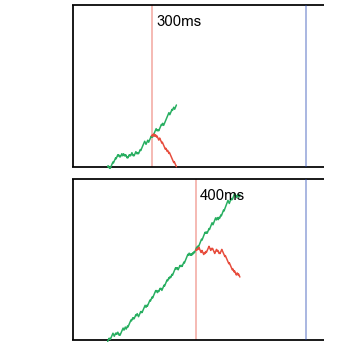
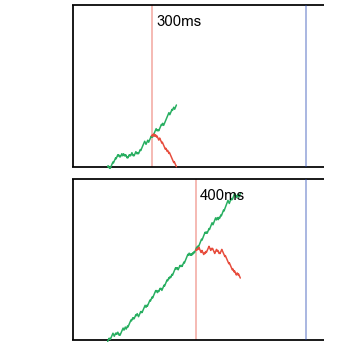
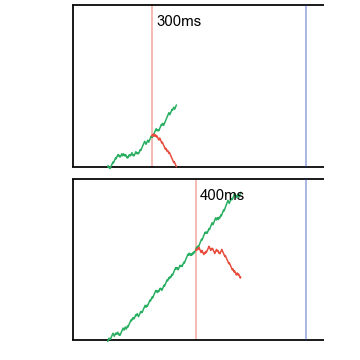
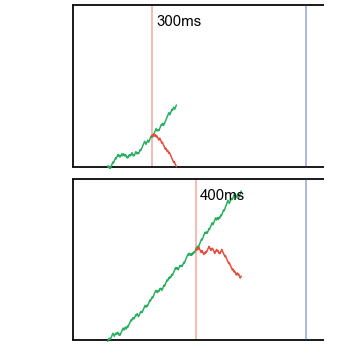
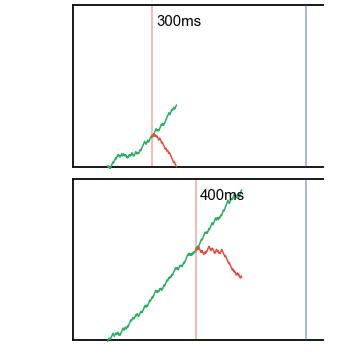
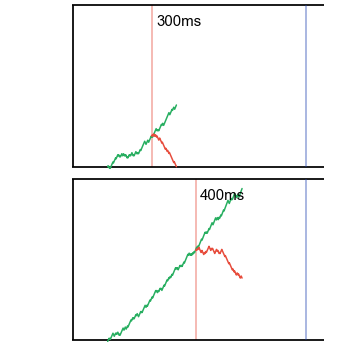
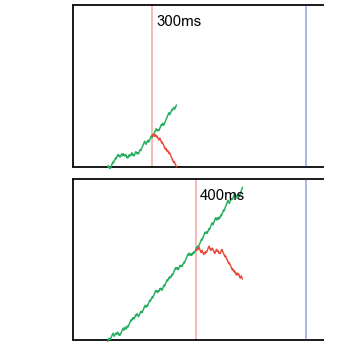
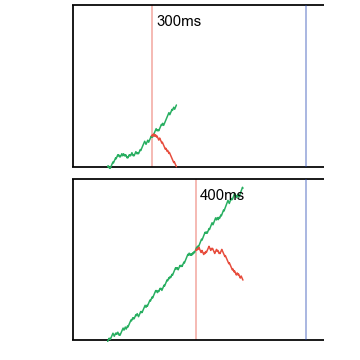
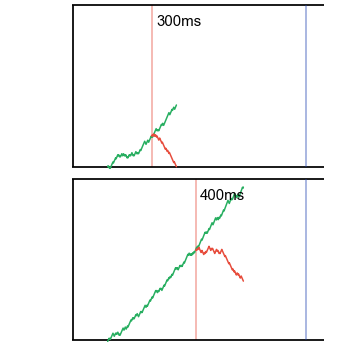
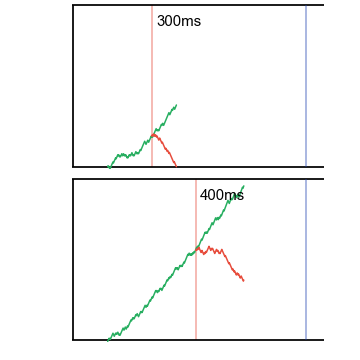
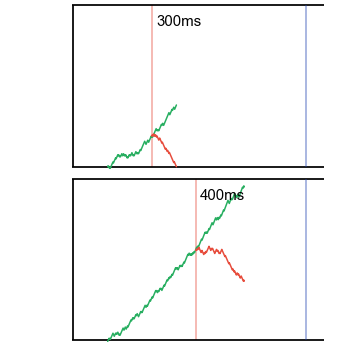
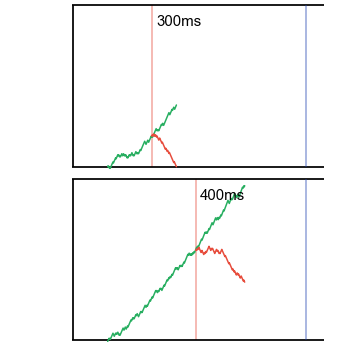
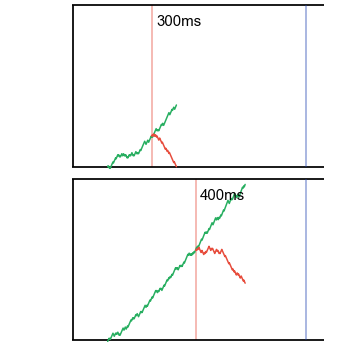
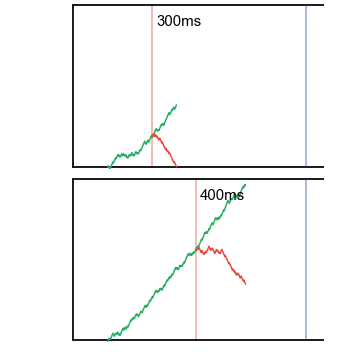
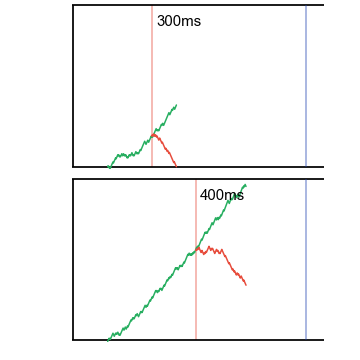
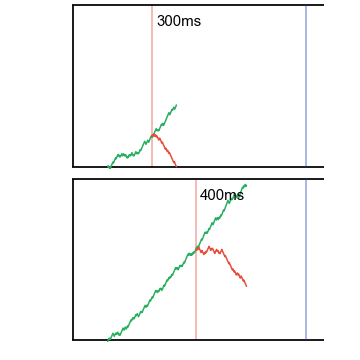
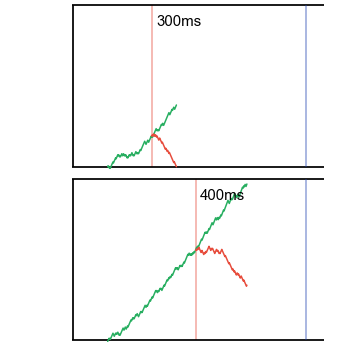
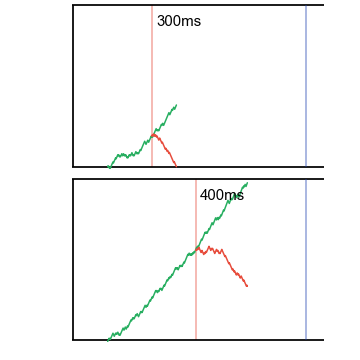
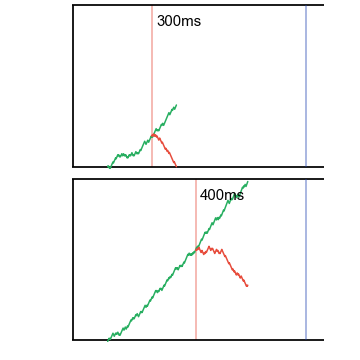
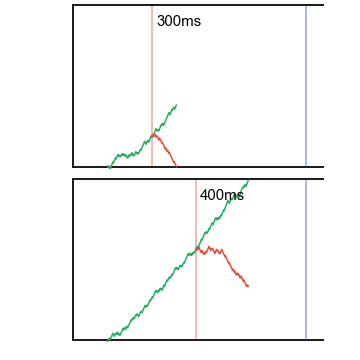
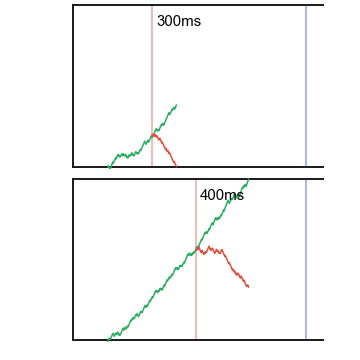

In [4]:
from JSAnimation import IPython_display
from matplotlib import animation
f, f_args, nframes = vis.animated_dpm_example(dpm)
animation.FuncAnimation(f, vis.re_animate_multiax, fargs=f_args, frames=nframes, interval=4, blit=True)

### columns in model's observed dataframe (model.observedDF)
* **idx**: subject ID
* **Cond**: Baseline(bsl)/Caution(pnl) (could be any experimental condition of interest) 
* **Acc**: Accuracy on "go" trials
* **200 - 400**: SSD conditions (in ms)
* **c10 - c90**: 10th - 90th RT quantiles for correct responses
* **e10 - e90**: 10th - 90th RT quantiles for error responses

In [ ]:
dpm.observedDF.head()

## Optimize DPM to the average data (across subjects; drift-rate free between Baseline/Caution) 

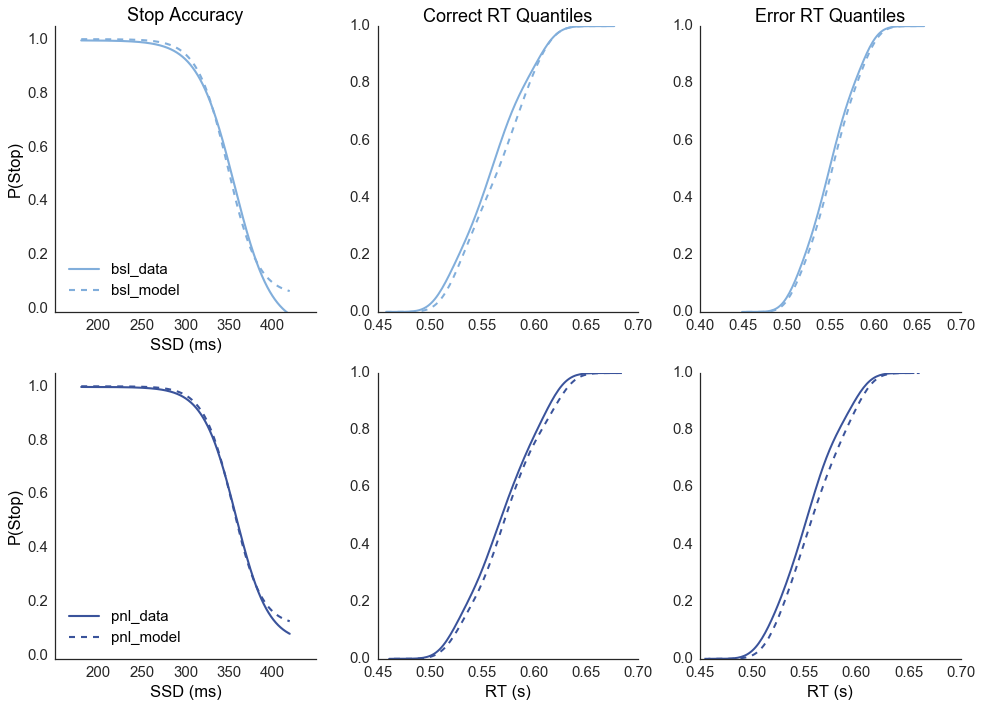

In [133]:
# fit DPM using combination of global (basinhopping + TNC)
# and local gradient optimization (Nelder-Mead Simplex)
dpm.set_basinparams(disp=False)
dpm.optimize()
dpm.plot_model_fits(dpm.observed[0], dpm.yhat, save=False)

## Examine fits
* txt summary of the fit results are saved to the working dir 

In [138]:
# the fit summary (goodness of fit measures, etc.) 
# is also available in .finfo attr
dpm.finfo

v_bsl      0.90917
v_pnl      0.87237
a          0.55563
xb         1.81323
ssv       -1.10396
tr         0.11691
cnvrg      1.00000
nfev      61.00000
nvary      2.00000
chi        0.00560
ndata     32.00000
df        30.00000
rchi       0.00019
logp    -274.73923
AIC     -270.73923
BIC     -270.58034
idx       28.00000
dtype: float64

In [139]:
# best-fit parameter estimates also stored in popt dictionary
dpm.popt

{'a': 0.55563098,
 'ssv': -1.1039584,
 'tr': 0.11691031,
 'v': array([ 0.90917,  0.87237]),
 'v_bsl': 0.90917056155872977,
 'v_pnl': 0.87236760362979426,
 'xb': 1.813231}